# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

Unlike other business, parks usually are not very popular to be reviewed on Yelp. It's very interesting to see if some areas in San Diego are  more likely to receive park reviews, and why.

This project analyzed Yelp review data, labelled each park with the census tract in San Diego, and compared different factors that may affect the number of total reviews for each census tract. But there are no strong evidence to conclude they have statistically significant relationships.

# Name & GitHub

- Name: Jinmou Li
- GitHub Username: jil732

# Research Question

*Fill in your research question here*

Why do different areas in San Diego have different average number of reviews for review parks and recreation centers on Yelp?

## Background and Prior Work

*Fill in your background and prior work here* 

People are very used to reviewing restruants and other places on Yelp, but what about parks and recreation centers?

Yelp is known for the platform to review businesses (1). Usually when people don't know if a local business is good, such as a resturant, they will refer to the reviews on Yelp. On the other hand, parks are usually operated by the city, and not usually labelled as local business.

"A park is an area of natural, semi-natural or planted space set aside for human enjoyment and recreation or for the protection of wildlife or natural habitats. Urban parks are green spaces set aside for recreation inside towns and cities. National parks and country parks are green spaces used for recreation in the countryside. State parks and provincial parks are administered by sub-national government states and agencies" (2).

"A recreation center is a place for recreational activities usually administered by a municipal government agency." (3)

"A census tract, census area, census district or meshblock[1] is a geographic region defined for the purpose of taking a census.[2] Sometimes these coincide with the limits of cities, towns or other administrative areas[2] and several tracts commonly exist within a county. Census tracts represent the smallest territorial entity for which population data are available in many countries.[3] In the United States, census tracts are subdivided into block groups and census blocks" (4). In this project, we use the census tract as the geography unit for our data.

The number of prior work on what motivates people to leave more reviews on Yelp for San Diego parks and recreation centers is very limited. As a result, I didn't have the luck to find any related work before the deadline of this project. I defintiely hope to invest more time on this part and unfortunately I don't think I can include any here.

For the gerneral number of reviews on Yelp, I found some information online (5). First, businesses on Yelp should encourage the customers to post reviews on Yelp. If there is any park that encourages the customers to do so, it's reasonable to expect them to have more reviews. But I don't have the data on this so it's not included in this project. Second, businesses should try to offer exclusive deals for customers using Yelp. I don't think this makes sense for most parks.

A most similar work to this project is (6). It is related since it's also spatial analysis and focused on clusters of business. For this project, however, we don't necessarily analysze the clustering of parks.

References (include links):
- 1) https://en.wikipedia.org/wiki/Yelp
- 2) https://en.wikipedia.org/wiki/Park
- 3) https://en.wikipedia.org/wiki/Recreation#Recreation_center
- 4) https://en.wikipedia.org/wiki/Census_tract
- 5) https://www.webstaurantstore.com/article/36/how-to-get-more-yelp-reviews.html
- 6) https://opengeospatialdata.springeropen.com/articles/10.1186/s40965-017-0020-9

# Hypothesis


*Fill in your hypotheses here*

The areas with the most popular parks are more likely to have higher average number of reviews on Yelp.

Reason: since we are calculating the average, the parks with the most reviews naturally will affect the average number in each area.

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

- Dataset Name: Park Locations Data
  - Link to the dataset: https://data.sandiego.gov/datasets/park-locations/
  - Number of observations: 2769
  - Used only to get the names of some San Diego parks and recreation centers

- Dataset Name: Rec Center Locations Data
  - Link to the dataset: https://data.sandiego.gov/datasets/recreation-center-locations/
  - Number of observations: 57
  - Used only to get the names of some San Diego parks and recreation centers

- Dataset Name: Joint Use Parks Data
  - Link to the dataset: https://data.sandiego.gov/datasets/joint-use/
  - Number of observations: 96
  - Used only to get the names of some San Diego parks and recreation centers

- Dataset Name: Yelp Data for San Diego Parks
  - Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_parks.csv
  - Number of observations: 833

- Dataset Name: California Environmental Health Screening Data
  - Link to the dataset: https://data.ca.gov/dataset/calenviroscreen-2-0
  - Number of observations: 8035

- Dataset Name: 2019 TIGER/Line® Shapefiles: Census Tracts
  - Link to the dataset: https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2019&layergroup=Census+Tracts
  - Number of observations: 8057

- Dataset Name: ADDRESS_APN
  - Link to the dataset: https://rdw.sandag.org/Account/gisdtview?dir=Address
  - Number of observations: 1166568
  - Used only to get zip codes of San Diego
  
### How to combine

For the first 3 data sets, they are used only to get a set of names of San Diego parks and recreastion ceters to filter the data of the yelp data.

The screening data and the census tract data are combined with the tract ID, and used to label the yelp data and visualize the distribution of average review counts.

Those 2 data sets are combined with the yelp data using the latitude and longitude.

For the last dataset, its only use is to get San Diego zip codes.

# Setup

In [1]:
## YOUR CODE HERE
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
   
import seaborn as sns
sns.set()
sns.set_context('talk')

import re
from scipy.spatial import cKDTree

from shapely.ops import nearest_points

import patsy
import statsmodels.api as sm
import scipy.stats as stats

# Data Cleaning

Describe your data cleaning steps here.

After converting the strings to lower cases, unnecessary data are dropped, either because those columns are not used in this project or the rows do not belong to San Diego.

In [2]:
# Read the data

df_parkl = gpd.read_file('../data/parks_datasd.geojson')
df_dict_parkl = pd.read_csv('../data/parks_dictionary_datasd.csv')
df_recl = gpd.read_file('../data/rec_centers_datasd.geojson')
df_joint = gpd.read_file('../data/joint_use_datasd.geojson')

df_ypark = pd.read_csv('../data/yelp_SD_parks.csv', dtype={'phone':str})

df_dict_screen = pd.read_excel('../data/cal-enviro-screen-data-dictionary.xlsx')
df_screen = pd.read_csv('../data/calenviroscreen-final-report.csv')

gdf_census_tracts = gpd.read_file('../data/tl_2019_06_tract/tl_2019_06_tract.shp')
gdf_census_tracts['GEOID'] = gdf_census_tracts['GEOID'].apply(int)

shp_address_apn = gpd.read_file('../data/Address_APN/ADDRESS_APN.shp')

In [3]:
# Shape of data

print(df_parkl.shape)
print(df_recl.shape)
print(df_joint.shape)
print(df_ypark.shape)
print(df_screen.shape)
print(gdf_census_tracts.shape)
print(shp_address_apn.shape)

(2769, 8)
(57, 29)
(96, 29)
(833, 10)
(8035, 52)
(8057, 13)
(1166568, 22)


## Quick peek for each dataset:

In [4]:
df_parkl.dtypes

objectid        int64
name           object
alias          object
gis_acres     float64
park_type      object
location       object
owner          object
geometry     geometry
dtype: object

In [5]:
df_dict_parkl

field field_type                              description  \
0   objectid    Integer                        Unique identifier   
1       name     String                          Short park name   
2      alias     String                           Long park name   
3  gis_acres      Float  Number of acres calculated from polygon   
4  park_type     String                             Type of park   
5   location     String                     Location description   
6      owner     String                                Ownership   

                                     possible_values  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  Historic, Local, National, Open Space, Other, ...  
5                                                NaN  
6                                                NaN

In [6]:
df_parkl.head()

objectid                     name                       alias   gis_acres  \
0         1        South Carlsbad SB  South Carlsbad State Beach  115.895878   
1         2          Torrey Pines SB    Torrey Pines State Beach   67.294309   
2         3              Ruocco Park                 Ruocco Park    3.312526   
3         4         Tuna Harbor Park            Tuna Harbor Park    0.639035   
4         5  San Diego Bayfront Park     San Diego Bayfront Park    3.669272   

  park_type                                    location        owner  \
0     State                                              State Parks   
1     State                                              State Parks   
2     Local        585 Harbor Ln, San Diego. California        SDUPD   
3     Local  700 North Harbor Dr, San Diego. California        SDUPD   
4     Local   One Park Boulevard, San Diego. California        SDUPD   

                                            geometry  
0  (POLYGON ((-117.31431416 33.09015277, -117.314...  
1  POLYGON ((-117.26146727 32.93883263, -117.2618...  
2  POLYGON ((-117.17297864 32.71167072, -117.1730...  
3  POLYGON ((-117.17260218 32.71160396, -117.1726...  
4  (POLYGON ((-117.16074113 32.70406597, -117.159...

In [7]:
df_recl.dtypes

objectid         int64
rec_bldg        object
park_name       object
address         object
zip              int64
sq_ft            int64
year_built       int64
serv_dist       object
adult_ctr        int64
comfort_st       int64
comp_rm          int64
dance_rm         int64
game_rm          int64
gymnasium        int64
kiln             int64
kiln_rm          int64
kitchen          int64
multp_rm         int64
racqb_ct         int64
stage            int64
teen_ctr         int64
tinytot_rm       int64
weight_rm        int64
current_cd       int64
fy13_cd          int64
facility_n       int64
thomas_bro      object
community       object
geometry      geometry
dtype: object

In [8]:
df_recl.head()

objectid                   rec_bldg                      park_name  \
0      2935   Scripps Ranch Rec Center   Scripps Ranch Community Park   
1      2936      North Park Rec Center      North Park Community Park   
2      2937      Southcrest Rec Center      Southcrest Community Park   
3      2938          Azalea Rec Center       Azalea Neighborhood Park   
4      2939  Colina Del Sol Rec Center  Colina Del Sol Community Park   

                  address    zip  sq_ft  year_built serv_dist  adult_ctr  \
0  11454  Blue Cypress Dr  92131  12080        2000        40          0   
1          4044  Idaho St  92104  11230        1947        41          1   
2         4149  Newton Av  92113  10620        1964        43          0   
3         2596  Violet St  92105   1790        1973        41          0   
4         5319  Orange Av  92115   6560        1962        41          0   

   comfort_st                ...                  stage  teen_ctr  tinytot_rm  \
0           0                ...                      0         0           0   
1           0                ...                      0         1           1   
2           0                ...                      0         1           0   
3           0                ...                      0         0           0   
4           0                ...                      0         0           0   

   weight_rm  current_cd  fy13_cd  facility_n  thomas_bro  \
0          0           5        5       10279     1210-A2   
1          0           3        3         488     1269-D5   
2          1           8        9         299     1289-H6   
3          0           3        9        1072     1269-H7   
4          0           7        9         491     1269-H4   

               community                           geometry  
0    MIRAMAR RANCH NORTH  POINT (-117.07985884 32.92867422)  
1             NORTH PARK  POINT (-117.13418236 32.75090087)  
2             SOUTHCREST  POINT (-117.10459424 32.69427131)  
3  AZALEA/HOLLYWOOD PARK  POINT (-117.10817167 32.73236464)  
4         COLINA DEL SOL  POINT (-117.08011698 32.75281786)  

[5 rows x 29 columns]

In [9]:
df_joint.dtypes

objectid         int64
name            object
facility        object
school_dis      object
city_acres     float64
dist_acres     float64
enhanced        object
strt_date       object
term_yrs         int64
exp_date        object
address         object
community       object
notes           object
council_di       int64
serv_dist        int64
playground       int64
tot_lot          int64
playg_inst       int64
baseb_50_6       int64
baseb_90         int64
softball         int64
multi_purp       int64
basketball       int64
tennis_ct        int64
sand_vball       int64
field_ligh       int64
comfort_st       int64
concess_st       int64
geometry      geometry
dtype: object

In [10]:
df_joint.head()

objectid                          name                     facility  \
0      2087              Adams Elementary  Adams Avenue Community Park   
1      2088             Alcott Elementary            Alcott Elementary   
2      2089    Bayview Terrace Elementary   Bayview Terrace Elementary   
3      2090          Bird Rock Elementary  Bird Rock Neighborhood Park   
4      2091  Black Mountain Middle School        Black Mountain Middle   

          school_dis  city_acres  dist_acres enhanced   strt_date  term_yrs  \
0  San Diego Unified        1.12        1.38        N  1990-07-23        25   
1  San Diego Unified        0.00        6.11        N  2006-09-19        25   
2  San Diego Unified        0.00        3.50        N  2000-10-16        25   
3  San Diego Unified        0.70        1.09        Y  2005-05-03        25   
4  San Diego Unified        0.00        1.60        N  1990-06-11        50   

              exp_date                        ...                          \
0  2015-07-23T00:00:00                        ...                           
1  2031-09-19T00:00:00                        ...                           
2  2025-10-10T00:00:00                        ...                           
3  2030-05-03T00:00:00                        ...                           
4  2040-05-29T00:00:00                        ...                           

  baseb_90 softball multi_purp  basketball  tennis_ct  sand_vball  field_ligh  \
0        0        1          1           0          0           0           0   
1        0        1          1           0          0           0           0   
2        0        1          1           1          0           0           0   
3        0        1          1           1          0           0           0   
4        0        0          0           0          0           0           0   

   comfort_st  concess_st                                           geometry  
0           0           0  POLYGON ((-117.11739692 32.76309342, -117.1182...  
1           0           0  POLYGON ((-117.22107457 32.83164684, -117.2206...  
2           0           0  (POLYGON ((-117.222595 32.80191264, -117.22259...  
3           0           0  (POLYGON ((-117.26282678 32.81081951, -117.262...  
4           0           0  POLYGON ((-117.12547035 32.96961513, -117.1253...  

[5 rows x 29 columns]

In [11]:
df_ypark.dtypes

name             object
address          object
phone            object
id               object
url              object
rating          float64
review_count      int64
longitude       float64
latitude        float64
is_closed          bool
dtype: object

In [12]:
df_ypark.head()

name                                       address  \
0        Balboa Park             1549 El Prado San Diego, CA 92101   
1        Civita Park          7960 Civita Blvd San Diego, CA 92108   
2    Waterfront Park          1600 Pacific Hwy San Diego, CA 92101   
3  Trolley Barn Park  Adams Ave And Florida St San Diego, CA 92116   
4      Bay View Park                 413 1st St Coronado, CA 92118   

         phone                      id  \
0  16192390512  9M_FW_-Ipx93I36w-_ykBg   
1          NaN  3AEHjqNrTmggA6G9VdhQfg   
2  16192327275  3unbJeYrn1RmInZGmjp80g   
3          NaN  PvHxIYrmaiFKdWUDTMDzcg   
4          NaN  6IF4VB9-fkv_F-LBvG8ppQ   

                                                 url  rating  review_count  \
0  https://www.yelp.com/biz/balboa-park-san-diego...     5.0          2105   
1  https://www.yelp.com/biz/civita-park-san-diego...     4.5            46   
2  https://www.yelp.com/biz/waterfront-park-san-d...     4.5           242   
3  https://www.yelp.com/biz/trolley-barn-park-san...     4.5           102   
4  https://www.yelp.com/biz/bay-view-park-coronad...     5.0            42   

    longitude   latitude  is_closed  
0 -117.153150  32.734502      False  
1 -117.147278  32.778315      False  
2 -117.172479  32.721952      False  
3 -117.143789  32.762463      False  
4 -117.178967  32.701785      False

In [13]:
# Number of parks
len(df_ypark)

833

In [14]:
# Number of parks with less than 50 reviews
len(df_ypark[df_ypark['review_count'] < 50])

522

In [15]:
# Number of parks with less than 100 reviews
len(df_ypark[df_ypark['review_count'] < 100])

616

In [16]:
# Dictionary of screen data
df_dict_screen

Field Title                  Field Name  \
0                             Census Tract                Census Tract   
1                         Total Population            Total Population   
2                        California County           California County   
3                                      ZIP                         ZIP   
4                                     City                        City   
5                                Longitude                   Longitude   
6                                 Latitude                    Latitude   
7                CalEnviroScreen 2.0 Score               CES 2.0 Score   
8   CalEnviroScreen 2.0 \nPercentile Range  CES 2.0 \nPercentile Range   
9                                    Ozone                       Ozone   
10                        Ozone Percentile                  Ozone Pctl   
11                  Particulate Matter 2.5                       PM2.6   
12                        PM2.5 Percentile                  PM2.5 Pctl   
13               Diesel Particulate Matter                   Diesel PM   
14    Diesel Particulate Matter Percentile              Diesel PM Pctl   
15                          Drinking Water              Drinking Water   
16               Drinking Water Percentile         Drinking Water Pctl   
17                              Pesticides                  Pesticides   
18                   Pesticides Percentile             Pesticides Pctl   
19                           Toxic Release                Tox. Release   
20                Toxic Release Percentile           Tox. Release Pctl   
21                                 Traffic                     Traffic   
22                      Traffic Percentile                Traffic Pctl   
23                           Cleanup Sites               Cleanup Sites   
24                Cleanup Sites Percentile          Cleanup Sites Pctl   
25                     Groundwater Threats         Groundwater Threats   
26          Groundwater Threats Percentile    Groundwater Threats Pctl   
27                         Hazardous Waste                  Haz. Waste   
28              Hazardous Waste Percentile             Haz. Waste Pctl   
29                   Impaired Water Bodies           Imp. Water Bodies   
30        Impaired Water Bodies Percentile      Imp. Water Bodies Pctl   
31                             Solid Waste                 Solid Waste   
32                  Solid Waste Percentile            Solid Waste Pctl   
33                        Pollution Burden            Pollution Burden   
34                  Pollution Burden Score      Pollution Burden Score   
35             Pollution Burden Percentile       Pollution Burden Pctl   
36                                     Age                         Age   
37                          Age Percentile                    Age Pctl   
38                                  Asthma                      Asthma   
39                             Asthma Pctl                 Asthma Pctl   
40                        Low Birth Weight            Low Birth Weight   
41             Low Birth Weight Percentile       Low Birth Weight Pctl   
42                               Education                   Education   
43                    Education Percentile              Education Pctl   
44                    Linguistic Isolation        Linguistic Isolation   
45         Linguistic Isolation Percentile   Linguistic Isolation Pctl   
46                                 Poverty                     Poverty   
47                      Poverty Percentile                Poverty Pctl   
48                            Unemployment                Unemployment   
49                 Unemployment Percentile           Unemployment Pctl   
50              Population Characteristics                 Pop. Char.    
51        Population Characteristics Score            Pop. Char. Score   
52   Population Characteristics Percentile             Pop. Char. Pctl   

     Data Type                    

In [17]:
df_screen.dtypes

Census Tract                   int64
Total Population               int64
California County             object
Click for interactive map    float64
CES 2.0 Score                float64
CES 2.0 Percentile Range      object
Hyperlink                     object
Ozone                        float64
Ozone Pctl                   float64
PM2.5                        float64
PM2.5 Pctl                   float64
Diesel PM                    float64
Diesel PM Pctl               float64
Drinking Water               float64
Drinking Water Pctl          float64
Pesticides                   float64
Pesticides Pctl              float64
Tox. Release                 float64
Tox. Release Pctl            float64
Traffic                      float64
Traffic Pctl                 float64
Cleanup Sites                float64
Cleanup Sites Pctl           float64
Groundwater Threats          float64
Groundwater Threats Pctl     float64
Haz. Waste                   float64
Haz. Waste Pctl              float64
I

In [18]:
df_screen.head()

Census Tract  Total Population California County  \
0    6019001100              3174           Fresno    
1    6019000300              3609           Fresno    
2    6019000200              3167           Fresno    
3    6019001500              2206           Fresno    
4    6019000600              6161           Fresno    

   Click for interactive map  CES 2.0 Score  CES 2.0 Percentile Range  \
0                        NaN          89.22  96-100% (highest scores)   
1                        NaN          83.71  96-100% (highest scores)   
2                        NaN          83.47  96-100% (highest scores)   
3                        NaN          83.08  96-100% (highest scores)   
4                        NaN          82.95  96-100% (highest scores)   

                                           Hyperlink     Ozone  Ozone Pctl  \
0  http://oehha.maps.arcgis.com/apps/Viewer/index...  0.255228       80.87   
1  http://oehha.maps.arcgis.com/apps/Viewer/index...  0.287130       83.28   
2  http://oehha.maps.arcgis.com/apps/Viewer/index...  0.304446       84.40   
3  http://oehha.maps.arcgis.com/apps/Viewer/index...  0.225687       78.25   
4  http://oehha.maps.arcgis.com/apps/Viewer/index...  0.327935       85.81   

       PM2.5                        ...                          \
0  14.746087                        ...                           
1  14.619618                        ...                           
2  14.554656                        ...                           
3  14.937649                        ...                           
4  14.506413                        ...                           

   Linguistic Isolation  Linguistic Isolation Pctl    Poverty  Poverty Pctl  \
0                  21.6                      83.66  77.500865         97.78   
1                  18.3                      78.34  81.204032         98.93   
2                  16.2                      74.04  86.828423         99.66   
3                  19.5                      80.68  62.746088         88.32   
4                  16.9                      75.49  88.680993         99.79   

   Unemployment  Unemployment Pctl  Pop. Char.   Pop. Char. Score  \
0         19.30              92.05    90.072268          9.360658   
1           NaN                NaN    92.323243          9.594592   
2         25.27              98.14    91.499039          9.508958   
3         18.30              89.60    83.474281          8.674967   
4         26.69              98.61    92.246260          9.586590   

   Pop. Char. Pctl                                         Location 1  
0            99.60   Fresno 93706\n(36.709695199999999, -119.7816961)  
1            99.90   Fresno 93706\n(36.726461999999998, -119.8010347)  
2            99.80   Fresno 93706\n(36.735491400000001, -119.8055044)  
3            97.74  Fresno 93725\n(36.681600000000003, -119.717842...  
4            99.89   Fresno 93721\n(36.743062999999999, -119.7933565)  

[5 rows x 52 columns]

In [19]:
# List the counties in the dataset
df_screen['California County'].unique()

array(['Fresno ', 'San Bernardino', 'Los Angeles', 'Kern ', 'San Joaquin',
       'Kings ', 'Riverside ', 'Stanislaus ', 'Tulare ', 'Merced ',
       'San Diego', 'Yolo ', 'Madera ', 'Sacramento ', 'Ventura ',
       'Orange ', 'Santa Clara', 'Alameda ', 'Monterey ', 'Yuba ',
       'Contra Costa', 'San Francisco', 'Imperial ', 'Solano ',
       'San Mateo', 'Tehama ', 'Butte ', 'Santa Barbara', 'Santa Cruz',
       'Sutter ', 'Sonoma ', 'Placer ', 'Glenn ', 'Shasta ', 'San Benito',
       'Colusa ', 'Nevada ', 'Napa ', 'Mendocino ', 'Marin ',
       'San Luis Obispo', 'Inyo ', 'Humboldt ', 'Tuolumne ', 'Amador ',
       'Siskiyou ', 'Plumas ', 'Lake ', 'Lassen ', 'Mariposa ',
       'El Dorado', 'Modoc ', 'Calaveras ', 'Sierra ', 'Del Norte',
       'Mono ', 'Trinity ', 'Alpine '], dtype=object)

In [20]:
gdf_census_tracts.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID          int64
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [21]:
gdf_census_tracts.head()

STATEFP COUNTYFP TRACTCE       GEOID     NAME              NAMELSAD  MTFCC  \
0      06      037  139301  6037139301  1393.01  Census Tract 1393.01  G5020   
1      06      037  139302  6037139302  1393.02  Census Tract 1393.02  G5020   
2      06      037  139502  6037139502  1395.02  Census Tract 1395.02  G5020   
3      06      037  139600  6037139600     1396     Census Tract 1396  G5020   
4      06      037  139701  6037139701  1397.01  Census Tract 1397.01  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  2865657       0  +34.1781538  -118.5581265   
1        S   338289       0  +34.1767230  -118.5383655   
2        S  1047548       0  +34.1628402  -118.5263110   
3        S  2477482       0  +34.1640599  -118.5101001   
4        S  3396396    2411  +34.1574290  -118.4954117   

                                            geometry  
0  POLYGON ((-118.571496 34.177579, -118.571484 3...  
1  POLYGON ((-118.540734 34.180195, -118.540704 3...  
2  POLYGON ((-118.532245 34.16201, -118.531768 34...  
3  POLYGON ((-118.518583 34.158576, -118.518583 3...  
4  POLYGON ((-118.5098 34.156908, -118.508484 34....

In [22]:
shp_address_apn.dtypes

ADDRNMBR       float64
ADDRFRAC        object
ADDRPDIR        object
ADDRNAME        object
ADDRPOSTD       object
ADDRSFX         object
ADDRUNIT        object
ADDRJUR         object
ADDRZIP         object
ROADSEGID        int64
APN             object
ASOURCE         object
X_COORD        float64
Y_COORD        float64
STATE           object
PLACEMENT_      object
COMMUNITY       object
ADDRESS_TY      object
PARCELID         int64
USNG            object
ORIG_OID         int64
geometry      geometry
dtype: object

In [23]:
shp_address_apn.head()

ADDRNMBR ADDRFRAC ADDRPDIR       ADDRNAME ADDRPOSTD ADDRSFX ADDRUNIT  \
0   11040.0     None     None      ICE SKATE      None      PL     None   
1    9324.0     None     None         GALVIN      None     AVE     None   
2   11549.0     None     None       WESTVIEW      None     PKY     None   
3   11678.0     None     None  COMPASS POINT         N      DR     None   
4   11511.0     None     None       WESTVIEW      None     PKY  B10  U6   

  ADDRJUR ADDRZIP  ROADSEGID                     ...                       \
0      SD   92126     189683                     ...                        
1      SD   92126     189680                     ...                        
2      SD   92126     189565                     ...                        
3      SD   92126     189553                     ...                        
4      SD   92126     189565                     ...                        

      X_COORD     Y_COORD  STATE  PLACEMENT_  COMMUNITY ADDRESS_TY PARCELID  \
0  6294083.50  1915870.58     CA           R  San Diego          I        0   
1  6293194.16  1915830.27     CA           R  San Diego       None        0   
2  6294720.54  1918596.15     CA           R  San Diego       None        0   
3  6293934.57  1919425.80     CA           R  San Diego       None        0   
4  6294836.10  1918342.86     CA           R  San Diego       None        0   

                 USNG  ORIG_OID                                     geometry  
0  11S MS 88595 42496         1  POINT (6294083.499963909 1915870.579988554)  
1  11S MS 88324 42481         2  POINT (6293194.159879088 1915830.270029813)  
2  11S MS 88783 43327         3  POINT (6294720.540028408 1918596.149996728)  
3  11S MS 88542 43579         4   POINT (6293934.57014367 1919425.799912229)  
4  11S MS 88819 43251         5  POINT (6294836.099836662 1918342.860148981)  

[5 rows x 22 columns]

## To lower names

In [24]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

df_parkl['name'] = df_parkl['name'].apply(str.lower)
df_parkl['alias'] = df_parkl['alias'].apply(str.lower)

df_recl['rec_bldg'] = df_recl['rec_bldg'].apply(str.lower)
df_recl['park_name'] = df_recl['park_name'].apply(str.lower)

df_joint['name'] = df_joint['name'].apply(str.lower)
df_joint['facility'] = df_joint['facility'].apply(str.lower)

df_ypark['name'] = df_ypark['name'].apply(str.lower)

shp_address_apn.dropna(inplace=True, subset=['COMMUNITY', 'ADDRZIP'])
shp_address_apn['COMMUNITY'] = shp_address_apn['COMMUNITY'].apply(str.lower)

### Get the set of "all" possiable names of parks and recreations

In [25]:
set_park_rec = set(df_parkl['name']).union(
    set(df_parkl['alias'])
).union(
    set(df_recl['rec_bldg'])
).union(
    set(df_recl['park_name'])
).union(
    set(df_joint['name'])
).union(
    set(df_joint['facility'])
)

len(set_park_rec)

1664

### Drop the non-park and non-recreation yelp reviews

In [26]:
tmp_to_drop = df_ypark[~df_ypark.apply(
    lambda x: 
    (x['name'] in set_park_rec) or
    any(keyword in x['name'] for keyword in [
        'park', 'complex', 'recreation', 'preserve', 'trail', 'pools', 'cove', 'national',
        'beach', 'shores', 'garden', 'plaza', 'reserve', 'playground', 'lake', 'mountain',
        'peak', 'canyon', 'rock', 'landing', 'italy', 'island', 'youth', 'boardwalk', 'photography',
        'kayak', 'community', 'zoo', 'seaworld', 'village', 'valley', 'museum', 'center', 'theatre',
        'pool', 'bridge', 'path', 'aquarium', 'utc', 'racetrack', 'falls', 'old globe', 'tour', 'golf',
        'marathon', 'ranch', 'crown point', 'bay of play', 'lighthouse', 'landscape', 'aquaplex',
        'skyride', 'viewpoint', 'field', 'diego bay', 'summit'
    ])
, axis=1)]
tmp_to_drop.sort_values(by=['review_count'], ascending=False).head()

name                                     address  \
804              phil's bbq  3750 Sports Arena Blvd San Diego, CA 92110   
585  extraordinary desserts           1430 Union St San Diego, CA 92101   
814                 hodad's        5010 Newport Ave San Diego, CA 92107   
818    the cottage la jolla             7702 Fay Ave La Jolla, CA 92037   
586           cucina urbana         1735 Hancock St San Diego, CA 92101   

           phone                      id  \
804  16192266333  eGhOLzFFIhrvF6QjSSpJsg   
585  16192947001  t4oCBN7Z9B7DtEtZihGCcg   
814  16192244623  nz_9juNiAC6JCZnUodslNA   
818  18584548409  KfkPjSTu0OV7yIPTZ4qi3w   
586  16192392222  aY_z6z6at7wyoW7sFhf4bA   

                                                   url  rating  review_count  \
804  https://www.yelp.com/biz/phils-bbq-san-diego-2...     4.5         14195   
585  https://www.yelp.com/biz/extraordinary-dessert...     4.0          7700   
814  https://www.yelp.com/biz/hodads-san-diego?adju...     4.0          5548   
818  https://www.yelp.com/biz/the-cottage-la-jolla-...     4.0          4211   
586  https://www.yelp.com/biz/cucina-urbana-san-die...     4.5          3987   

      longitude   latitude  is_closed  
804 -117.215988  32.754779      False  
585 -117.165795  32.720265      False  
814 -117.250990  32.747250      False  
818 -117.274957  32.843422      False  
586 -117.182778  32.741470      False

In [27]:
df_ypark = df_ypark[df_ypark.apply(
    lambda x: 
    (x['name'] in set_park_rec) or
    any(keyword in x['name'] for keyword in [
        'park', 'complex', 'recreation', 'preserve', 'trail', 'pools', 'cove', 'national',
        'beach', 'shores', 'garden', 'plaza', 'reserve', 'playground', 'lake', 'mountain',
        'peak', 'canyon', 'rock', 'landing', 'italy', 'island', 'youth', 'boardwalk', 'photography',
        'kayak', 'community', 'zoo', 'seaworld', 'village', 'valley', 'museum', 'center', 'theatre',
        'pool', 'bridge', 'path', 'aquarium', 'utc', 'racetrack', 'falls', 'old globe', 'tour', 'golf',
        'marathon', 'ranch', 'crown point', 'bay of play', 'lighthouse', 'landscape', 'aquaplex',
        'skyride', 'viewpoint', 'field', 'diego bay', 'summit'
    ]) and (not ('restaurant' in x['name'])),
axis=1)]

len(df_ypark)

498

In [28]:
df_ypark.head()

name                                       address  \
0        balboa park             1549 El Prado San Diego, CA 92101   
1        civita park          7960 Civita Blvd San Diego, CA 92108   
2    waterfront park          1600 Pacific Hwy San Diego, CA 92101   
3  trolley barn park  Adams Ave And Florida St San Diego, CA 92116   
4      bay view park                 413 1st St Coronado, CA 92118   

         phone                      id  \
0  16192390512  9M_FW_-Ipx93I36w-_ykBg   
1          NaN  3AEHjqNrTmggA6G9VdhQfg   
2  16192327275  3unbJeYrn1RmInZGmjp80g   
3          NaN  PvHxIYrmaiFKdWUDTMDzcg   
4          NaN  6IF4VB9-fkv_F-LBvG8ppQ   

                                                 url  rating  review_count  \
0  https://www.yelp.com/biz/balboa-park-san-diego...     5.0          2105   
1  https://www.yelp.com/biz/civita-park-san-diego...     4.5            46   
2  https://www.yelp.com/biz/waterfront-park-san-d...     4.5           242   
3  https://www.yelp.com/biz/trolley-barn-park-san...     4.5           102   
4  https://www.yelp.com/biz/bay-view-park-coronad...     5.0            42   

    longitude   latitude  is_closed  
0 -117.153150  32.734502      False  
1 -117.147278  32.778315      False  
2 -117.172479  32.721952      False  
3 -117.143789  32.762463      False  
4 -117.178967  32.701785      False

## Drop useless columns

In [29]:
df_ypark.drop(inplace=True, columns=['phone', 'id', 'url', 'is_closed'])
df_screen.drop(inplace=True, columns=['Click for interactive map', 'Hyperlink'])
gdf_census_tracts.drop(inplace=True, columns=['STATEFP', 'COUNTYFP', 'TRACTCE', 'NAME', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER'])
shp_address_apn = shp_address_apn[['COMMUNITY', 'ADDRZIP']].drop_duplicates()

## Drop useless dataframe

In [30]:
df_parkl = None
df_recl = None
df_joint = None

## Drop null rows and useless data

In [31]:
df_ypark.isnull().sum()

name            0
address         0
rating          0
review_count    0
longitude       1
latitude        1
dtype: int64

In [32]:
df_ypark.dropna(inplace=True)

In [33]:
# Only analysze San Diego data
df_screen = df_screen[df_screen['California County'] == 'San Diego'].drop(columns=['California County'])

In [34]:
df_screen.isnull().sum()

Census Tract                  0
Total Population              0
CES 2.0 Score                 4
CES 2.0 Percentile Range      4
Ozone                         1
Ozone Pctl                    1
PM2.5                         1
PM2.5 Pctl                    1
Diesel PM                     0
Diesel PM Pctl                0
Drinking Water                1
Drinking Water Pctl           1
Pesticides                    0
Pesticides Pctl               0
Tox. Release                  0
Tox. Release Pctl             0
Traffic                       0
Traffic Pctl                  0
Cleanup Sites                 0
Cleanup Sites Pctl            0
Groundwater Threats           0
Groundwater Threats Pctl      0
Haz. Waste                    0
Haz. Waste Pctl               0
Imp. Water Bodies             0
Imp. Water Bodies Pctl        0
Solid Waste                   0
Solid Waste Pctl              0
Pollution Burden              0
Pollution Burden Score        0
Pollution Burden Pctl         0
Age     

In [35]:
df_screen.dropna(inplace=True)

In [36]:
gdf_census_tracts.isnull().sum()

GEOID       0
INTPTLAT    0
INTPTLON    0
geometry    0
dtype: int64

In [37]:
# Only collect San Diego census tracts
census_tracts_sd = set(df_screen['Census Tract'])

In [38]:
gdf_census_tracts.isnull().sum()

GEOID       0
INTPTLAT    0
INTPTLON    0
geometry    0
dtype: int64

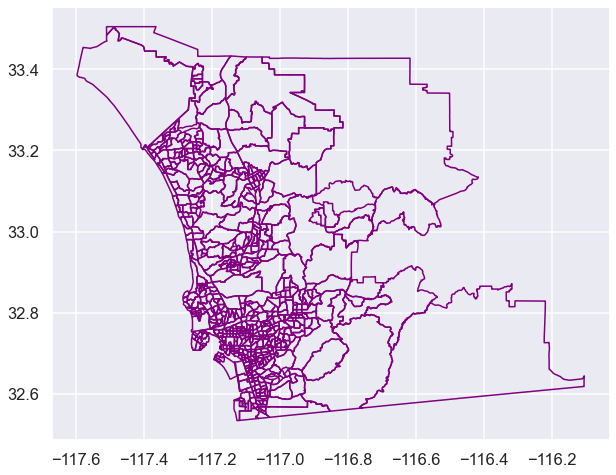

In [39]:
gdf_census_tracts = gdf_census_tracts[gdf_census_tracts['GEOID'].isin(census_tracts_sd)]
gdf_census_tracts.plot(figsize=(10,10), edgecolor="purple", facecolor="None")

## Plot the data and furtuher drop unnecessary rows

### Extract latitude and longtitude informaiton

In [40]:
# Extract latitude and longtitude from Location 1
df_screen_location_pattern = re.compile(r""".+\n\((?P<latitude>[-+]?\d*\.\d+|\d+?), (?P<longitude>[-+]?\d*\.\d+|\d+?)\)""")

def extract_screen_location(s):
    m = df_screen_location_pattern.match(s)

    la = float(m.group('latitude'))
    lo = float(m.group('longitude'))

    return (la, lo)

df_screen = df_screen.join(df_screen['Location 1'].apply(
    lambda x: pd.Series(extract_screen_location(x), index=['latitude', 'longitude']))).drop(columns=['Location 1'])

Text(0.5, 1.0, 'Park distribution reletive to census tracts')

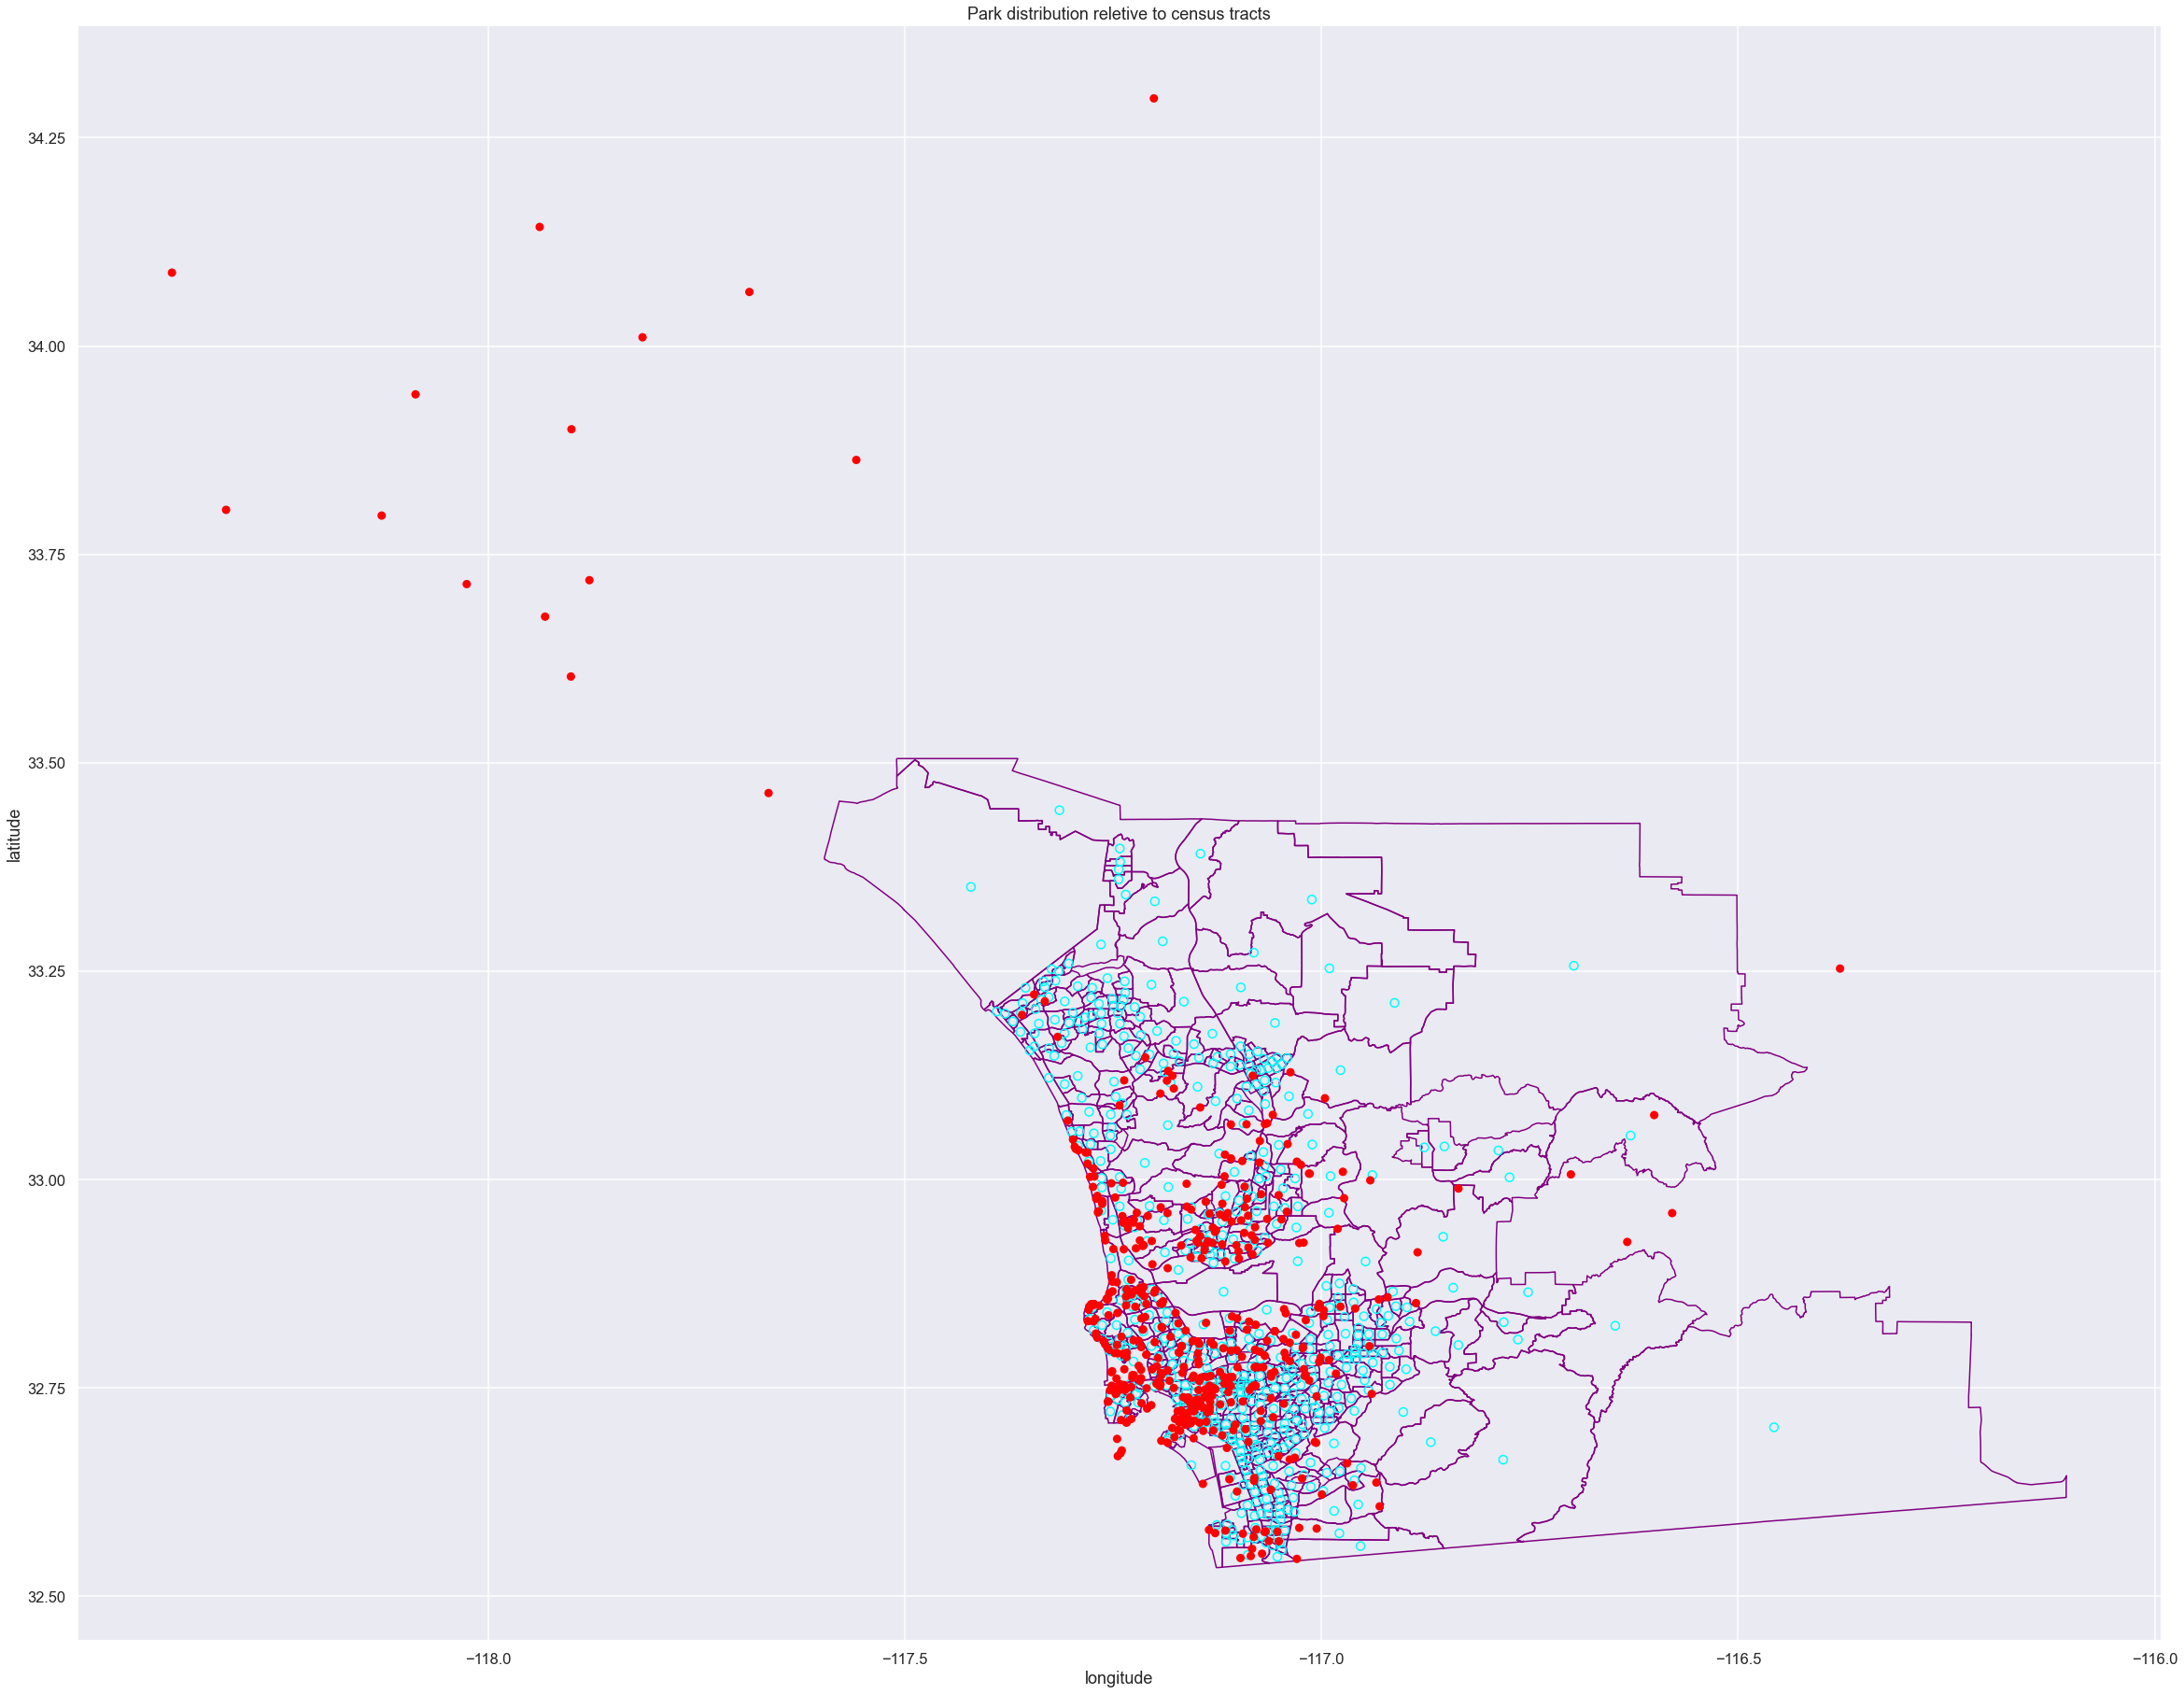

In [41]:
# Plot the distribution of the park relative to the census tracts
gdf_ypark = gpd.GeoDataFrame(df_ypark, geometry=gpd.points_from_xy(df_ypark.longitude, df_ypark.latitude))
gdf_screen = gpd.GeoDataFrame(df_screen, geometry=gpd.points_from_xy(df_screen.longitude, df_screen.latitude))

fig_park_screen, ax_park_screen = plt.subplots(figsize = (40,40)) 
gdf_census_tracts.plot(edgecolor="purple", facecolor="None", ax=ax_park_screen)
gdf_screen.plot(edgecolor="Cyan", facecolor="None", ax=ax_park_screen)
gdf_ypark.plot(edgecolor="None", facecolor="Red", ax=ax_park_screen)

ax_park_screen.set_ylabel('latitude')
ax_park_screen.set_xlabel('longitude')
ax_park_screen.set_title('Park distribution reletive to census tracts')

From the graph, we can simply count and see there are about 20 parks that are not in San Diego census tracts.

Let's try to remove them from the data.

In [42]:
zip_code_sd_partial = set(shp_address_apn['ADDRZIP'].unique())

In [43]:
tmp_to_drop = df_ypark[~df_ypark.apply(
    lambda x: 
    (x['address'][-5:] in zip_code_sd_partial) or
    ('San Diego' in x['address']) or
    ('La Jolla' in x['address'])
, axis=1)]

print(len(tmp_to_drop))
tmp_to_drop

18


name  \
74                                       sunset park   
92                               mount woodson trail   
180                                    memorial park   
194                                     encanto park   
225                                      lomita park   
242                            lake hodges reservoir   
311                                   los altos park   
327                                     kellogg park   
378                          silver moon photography   
458                               enjoy the mountain   
459                               enjoy the mountain   
469                               rolling hills park   
489  newport landing whale watching and sportfishing   
514                                  kit carson park   
554                                  mesa verde park   
565                                    lakeview park   
749                             sycamore canyon park   
802                                    saratoga park   

                                               address  rating  review_count  \
74            33345 Calle Naranja Dana Point, CA 92624     4.0             5   
92                 14644 Lake Poway Rd Poway, CA 92074     4.5           813   
180            Flower And Anahurst Santa Ana, CA 92707     3.5            11   
194                  777 Encanto Pkwy Duarte, CA 91010     4.5            19   
225                24428 Eshelman Ave Lomita, CA 90717     3.5            17   
242                        Lake Dr Escondido, CA 92033     4.5            54   
311               5485 Stearns St Long Beach, CA 90815     3.5             9   
327                  1635 Kellogg Ave Corona, CA 92879     3.5             7   
378  5904 Warner Ave Unit 187 Huntington Beach, CA ...     5.0            17   
458                           Lake Arrowhead, CA 92321     5.0           138   
459       8605 Santa Monica Blvd Los Angeles, CA 90069     4.5            53   
469          1515 E Bastanchury Rd Fullerton, CA 92835     5.0             6   
489                309 Palm St Newport Beach, CA 92661     3.5           920   
514          3333 Bear Valley Pkwy Escondido, CA 92033     4.0            71   
554                 1795 Samar Dr Costa Mesa, CA 92626     3.5             3   
565        10225 Jersey Ave Santa Fe Springs, CA 90670     4.0             4   
749      22930 Golden Springs Dr Diamond Bar, CA 91765     4.5           137   
802         10375-10399 Vernon Ave Montclair, CA 91763     5.0             1   

      longitude   latitude                          geometry  
74  -117.663437  33.463676  POINT (-117.6634369 33.46367645)  
92  -117.014870  33.007179   POINT (-117.0148704 33.0071789)  
180 -117.878387  33.719057   POINT (-117.878387 33.71905686)  
194 -117.938061  34.142907  POINT (-117.9380608 34.14290669)  
225 -118.314405  33.803455    POINT (-118.3144051 33.803455)  
242 -117.108637  33.066039     POINT (-117.108637 33.066039)  
311 -118.127696  33.796591  POINT (-118.1276964 33.79659145)  
327 -117.558147  33.863342  POINT (-117.5581473 33.86334218)  
378 -118.025627  33.714352   POINT (-118.0256271 33.7143519)  
458 -117.201034  34.297157  POINT (-117.2010336 34.29715665)  
459 -118.379351  34.088053    POINT (-118.379351 34.0880529)  
469 -117.899939  33.900170      POINT (-117.899939 33.90017)  
489 -117.900620  33.603460       POINT (-117.90062 33.60346)  
514 -117.058296  33.077590  POINT (-117.0582962 33.07759012)  
554 -117.931579  33.675310   POINT (-117.9315792 33.6753096)  
565 -118.087036  33.942048  POINT (-118.0870361 33.94204837)  
749 -117.814661  34.010508  POINT (-117.8146607 34.01050772)  
802 -117.686431  34.064903    POINT (-117.686431 34.0649027)

This is a good-enough approximation for the data points to drop. Let's remove them from our dataframe.

In [44]:
df_ypark = df_ypark[df_ypark.apply(
    lambda x: 
    (x['address'][-5:] in zip_code_sd_partial) or
    ('San Diego' in x['address']) or
    ('La Jolla' in x['address'])
, axis=1)]

Let's check the cleaned data.

In [45]:
# Reset the index after dropping
df_ypark.reset_index(inplace=True, drop=True)
df_screen.reset_index(inplace=True, drop=True)
gdf_census_tracts.reset_index(inplace=True, drop=True)
shp_address_apn.reset_index(inplace=True, drop=True)

In [46]:
# Check the shapes
print(df_ypark.shape)
print(df_screen.shape)
print(gdf_census_tracts.shape)
print(shp_address_apn.shape)

(479, 7)
(601, 51)
(601, 4)
(143, 2)


In [47]:
# Check the columns and types
df_ypark.dtypes

name              object
address           object
rating           float64
review_count       int64
longitude        float64
latitude         float64
geometry        geometry
dtype: object

In [48]:
df_screen.dtypes

Census Tract                    int64
Total Population                int64
CES 2.0 Score                 float64
CES 2.0 Percentile Range       object
Ozone                         float64
Ozone Pctl                    float64
PM2.5                         float64
PM2.5 Pctl                    float64
Diesel PM                     float64
Diesel PM Pctl                float64
Drinking Water                float64
Drinking Water Pctl           float64
Pesticides                    float64
Pesticides Pctl               float64
Tox. Release                  float64
Tox. Release Pctl             float64
Traffic                       float64
Traffic Pctl                  float64
Cleanup Sites                 float64
Cleanup Sites Pctl            float64
Groundwater Threats           float64
Groundwater Threats Pctl      float64
Haz. Waste                    float64
Haz. Waste Pctl               float64
Imp. Water Bodies               int64
Imp. Water Bodies Pctl        float64
Solid Waste 

In [49]:
gdf_census_tracts.dtypes

GEOID          int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [50]:
shp_address_apn.dtypes

COMMUNITY    object
ADDRZIP      object
dtype: object

Text(0.5, 1.0, 'Park distribution reletive to census tracts')

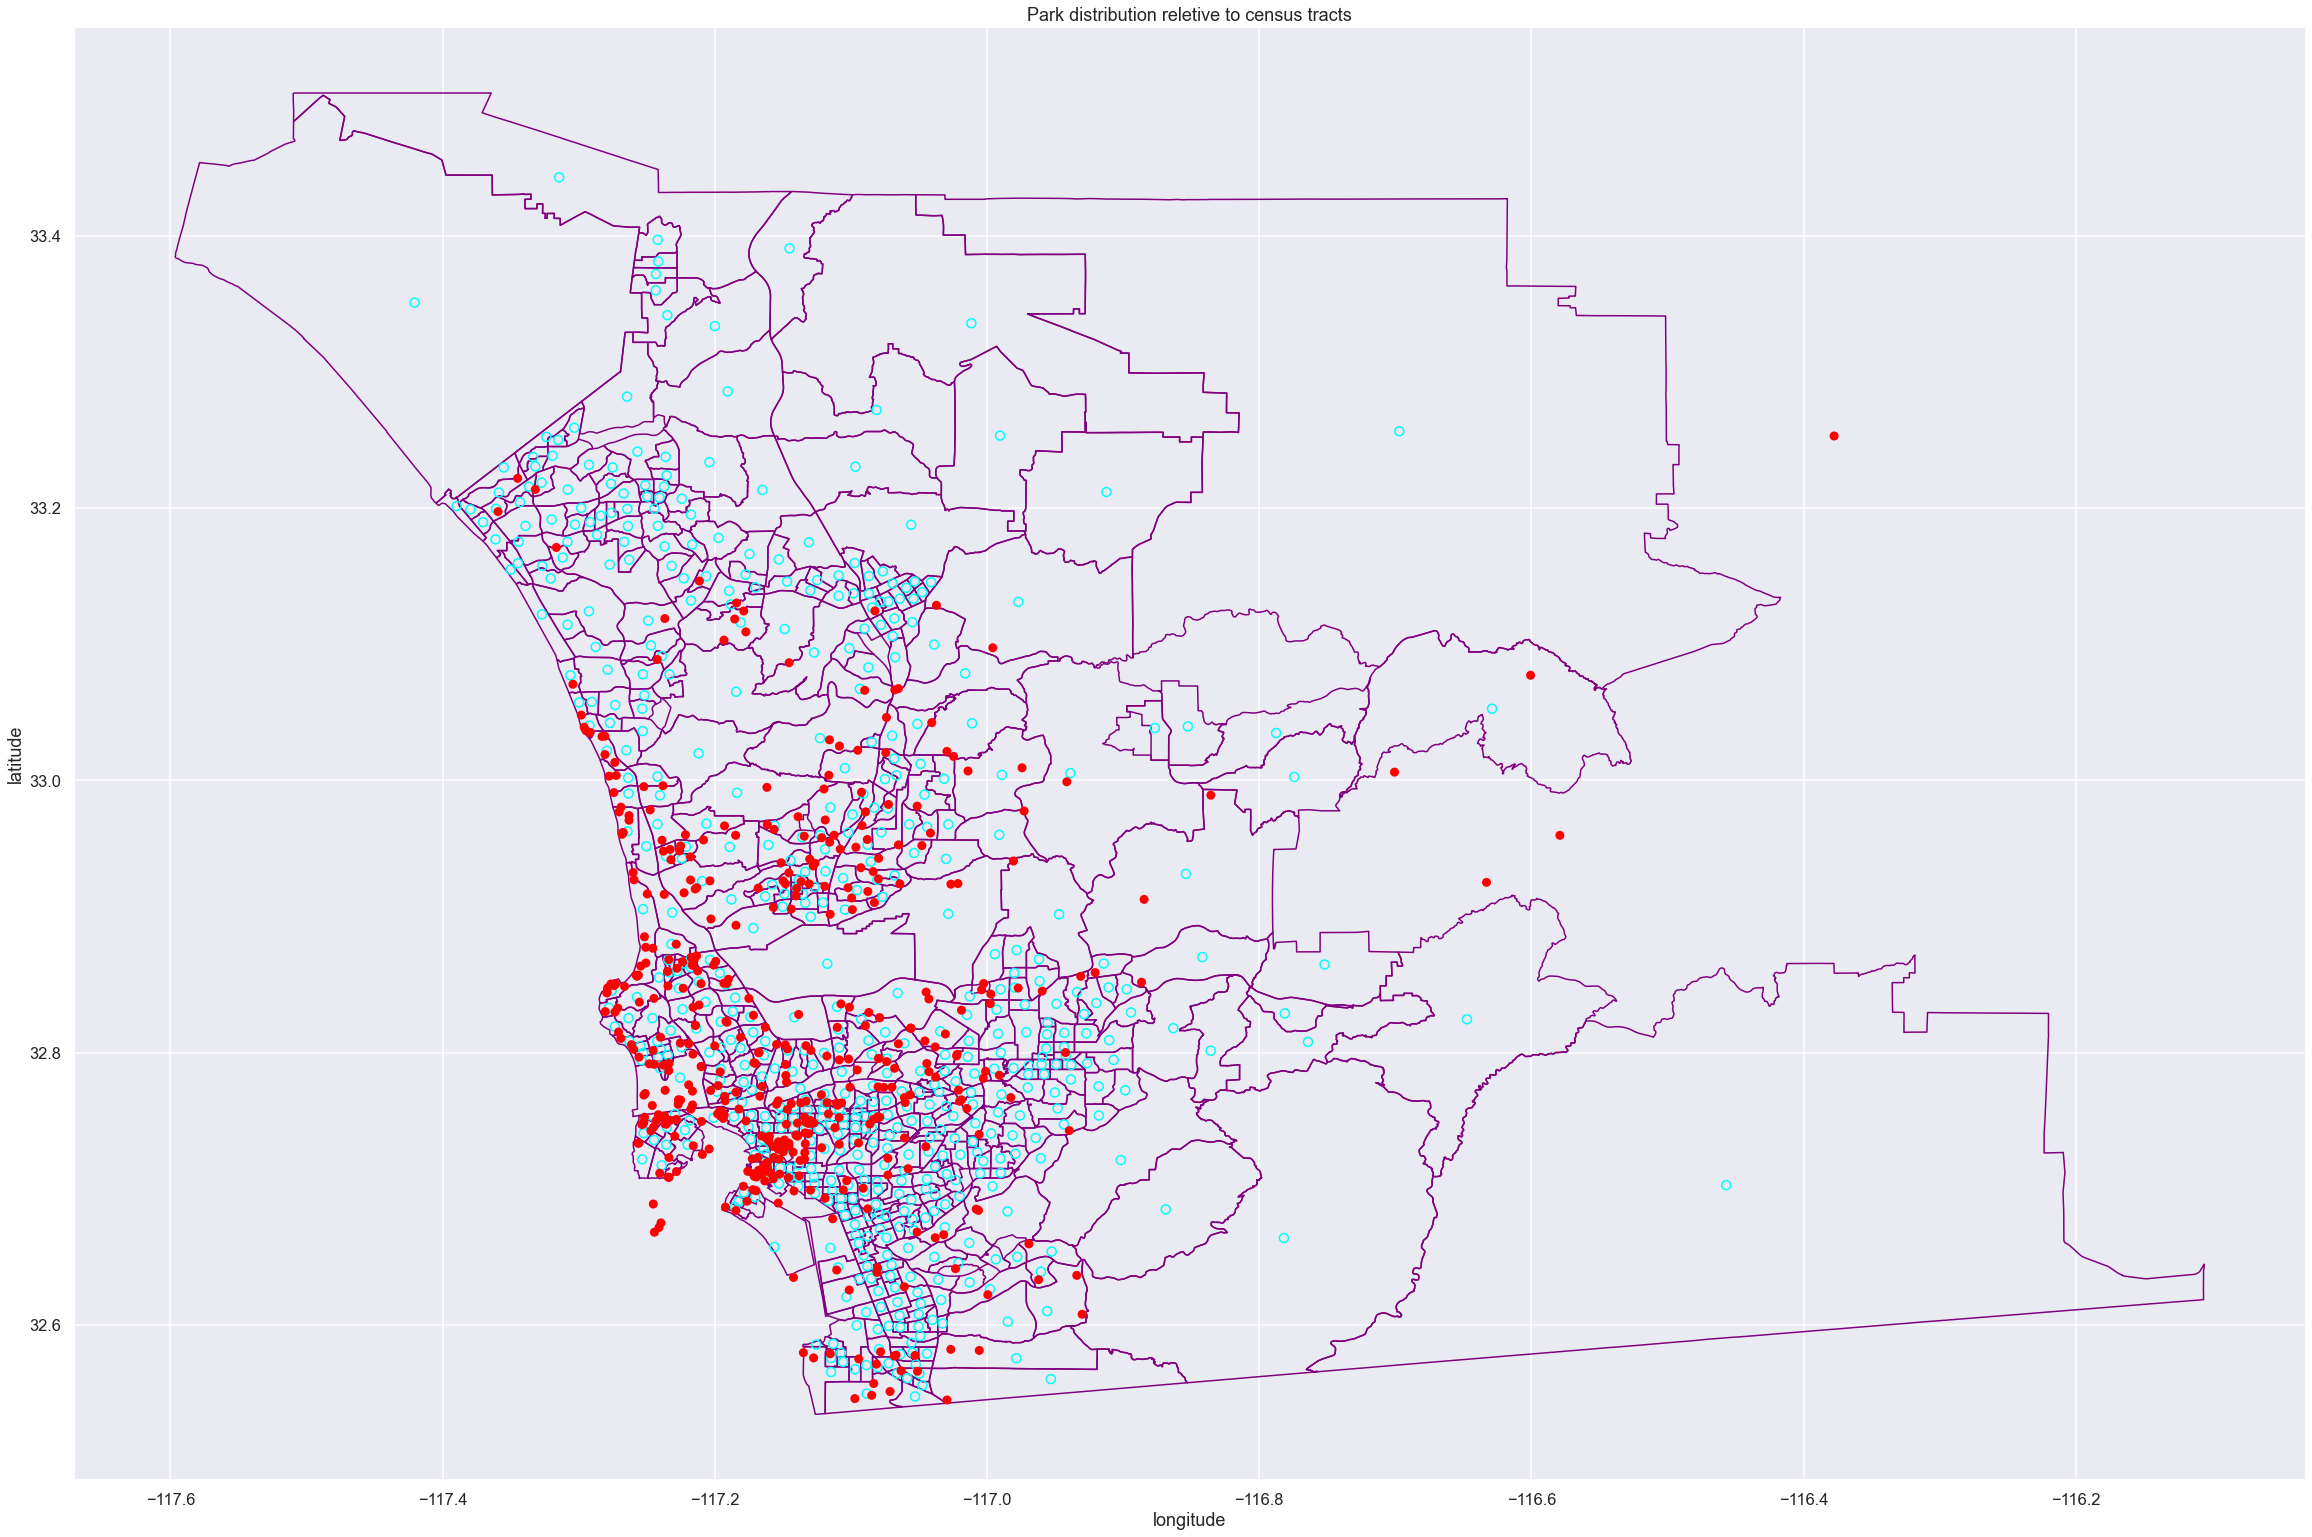

In [51]:
# Plot the distribution of parks
gdf_ypark = gpd.GeoDataFrame(df_ypark, geometry=gpd.points_from_xy(df_ypark.longitude, df_ypark.latitude))
gdf_screen = gpd.GeoDataFrame(df_screen, geometry=gpd.points_from_xy(df_screen.longitude, df_screen.latitude))

fig_park_screen, ax_park_screen = plt.subplots(figsize = (40,40)) 
gdf_census_tracts.plot(edgecolor="purple", facecolor="None", ax=ax_park_screen)
gdf_screen.plot(edgecolor="Cyan", facecolor="None", ax=ax_park_screen)
gdf_ypark.plot(edgecolor="None", facecolor="Red", ax=ax_park_screen)

ax_park_screen.set_ylabel('latitude')
ax_park_screen.set_xlabel('longitude')
ax_park_screen.set_title('Park distribution reletive to census tracts')

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

## EDA

What distributions do your variables take?

* The review_count is skewed, details (with graphs) are shown later

Are there any outliers?

* Yes, and they are also shown later. And the spatial outliers are removed in the last section

Relationship between variables?

* They are seemingly independent and the analysis will try to find any linear relationship
  
## Analysis

What approaches did you use? Why?

* I used cKDTree to find the nearest census tract center for each park, beacuse it's fast and accuracte enough for the purpose of this project
* I used correlation analysis, specifically the Spearman rank-order correlation coefficient, because it does not assume the data to be normally distributed and it gives p-value
* I used OLS regression, because it's efficient and reliable to analyze the linear relationship among multiple variable and it also outputs p-value

What were the results?

* None of the proposed factors that may affect the average number of reviews are proved to be statically significant

What were your interpretation of these findings

* It's very reasonable, considering most people do not care the review counts on Yelps for parks
* Details are included in the discussion

## Data Visualization 

Included in the following cells

## Analysis

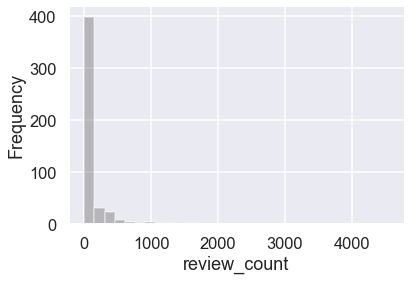

In [52]:
ax_review_distplot = sns.distplot(df_ypark['review_count'], bins=30, kde=False, color='#686868');
sns.despine()
ax_review_distplot.set_title('')
ax_review_distplot.set_ylabel('Frequency')
ax_review_distplot.set_xlabel('review_count');

We can see the review_count for parks are very skewed.

## Calculate the nearest census tract

We first use cKDTree to label each park with the nearest census tract.

Note we don't analyze the exact boundary of the tracts,

In [53]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

df_ypark = df_ypark.assign(
    Tract=[df_screen.at[idx, 'Census Tract'] for idx in cKDTree(df_screen[['longitude', 'latitude']]).query(df_ypark[['longitude', 'latitude']])[1]]
)

In [54]:
# Check the value counts
ypark_tract_counts = df_ypark['Tract'].value_counts()

In [55]:
# Check the distribution
ypark_tract_counts.sort_values()

6073008331     1
6073008362     1
6073017035     1
6073008003     1
6073011100     1
6073008901     1
6073002902     1
6073015701     1
6073010014     1
6073020307     1
6073020811     1
6073017054     1
6073019804     1
6073008002     1
6073020026     1
6073017702     1
6073008512     1
6073008511     1
6073016702     1
6073008509     1
6073008507     1
6073008505     1
6073008502     1
6073008501     1
6073003902     1
6073015200     1
6073002401     1
6073001900     1
6073018509     1
6073020801     1
              ..
6073008101     3
6073006802     3
6073017401     3
6073008330     3
6073008343     3
6073008345     3
6073009107     3
6073009603     3
6073017046     3
6073005100     3
6073002708     3
6073020027     4
6073017304     4
6073017501     4
6073009704     4
6073008329     4
6073007400     4
6073017200     5
6073008333     5
6073006801     5
6073008303     5
6073006000     5
6073006500     6
6073008200     8
6073005400     8
6073007100     9
6073007502    10
6073005300    

It seems that only 4 tracts have more than 9 parks, which seems a good distribution for mapping purpose. There is no big clustering.

In [56]:
# Number of tracts with only 1 park
ypark_tract_counts.where(ypark_tract_counts == 1, 0).sum()

146

In [57]:
# Number of tracts with at least 1 park
len(df_ypark['Tract'].unique())

255

In [58]:
# Number of tracts with 0 park
len(df_screen['Census Tract'].unique()) - len(df_ypark['Tract'].unique())

346

In [59]:
# Calculate the average of review counts for each census tract
df_tract_review = df_ypark.groupby('Tract')['review_count'].mean().to_frame().reset_index()
df_tract_review.head()

Tract  review_count
0  6073000100     22.500000
1  6073000202     55.000000
2  6073000500      5.000000
3  6073000700     15.000000
4  6073000800     84.333333

In [60]:
# Use 0 as the average for the tracts without parks
df_tract_review_zero = pd.DataFrame(list(set(df_screen['Census Tract'].unique())-set(df_tract_review['Tract'].unique())), columns=['Tract'])
df_tract_review_zero['review_count'] = float(0)
df_tract_review = pd.concat([df_tract_review, df_tract_review_zero]).sort_values(by=['Tract']).reset_index(drop=True)
df_tract_review.head()

Tract  review_count
0  6073000100          22.5
1  6073000201           0.0
2  6073000202          55.0
3  6073000300           0.0
4  6073000400           0.0

In [61]:
# Check the distribution and variance
df_tract_review.sort_values(by=['review_count'], ascending=False)[:10]

Tract  review_count
578  6073020710      2208.000
193  6073008901       911.000
107  6073006801       630.200
96   6073005100       609.000
100  6073005600       551.375
597  6073021800       518.000
139  6073008312       507.000
403  6073017021       476.000
226  6073009805       476.000
113  6073007301       469.500

In [62]:
df_tract_review.var()

Tract           3.654686e+07
review_count    1.604139e+04
dtype: float64

From above, however, we see the average number of reviews have non-minor variance, and the largest one is more than 2 times larger than the second largets value.

We visualize them on the map to have to better idea.

In [63]:
df_tract_review = df_tract_review.merge(gdf_census_tracts[['GEOID', 'geometry']], left_on='Tract', right_on='GEOID').drop(columns=['GEOID'])
gdf_tract_review = gpd.GeoDataFrame(df_tract_review, geometry='geometry')
gdf_tract_review.head()

Tract  review_count                                           geometry
0  6073000100          22.5  POLYGON ((-117.194904 32.75278, -117.19471 32....
1  6073000201           0.0  POLYGON ((-117.178867 32.75765, -117.177966 32...
2  6073000202          55.0  POLYGON ((-117.184043 32.74571, -117.183827 32...
3  6073000300           0.0  POLYGON ((-117.168645 32.748968, -117.168404 3...
4  6073000400           0.0  POLYGON ((-117.170867 32.75865, -117.170187 32...

Text(0.5, 1.0, 'Choropleth Map for Average Review Count')

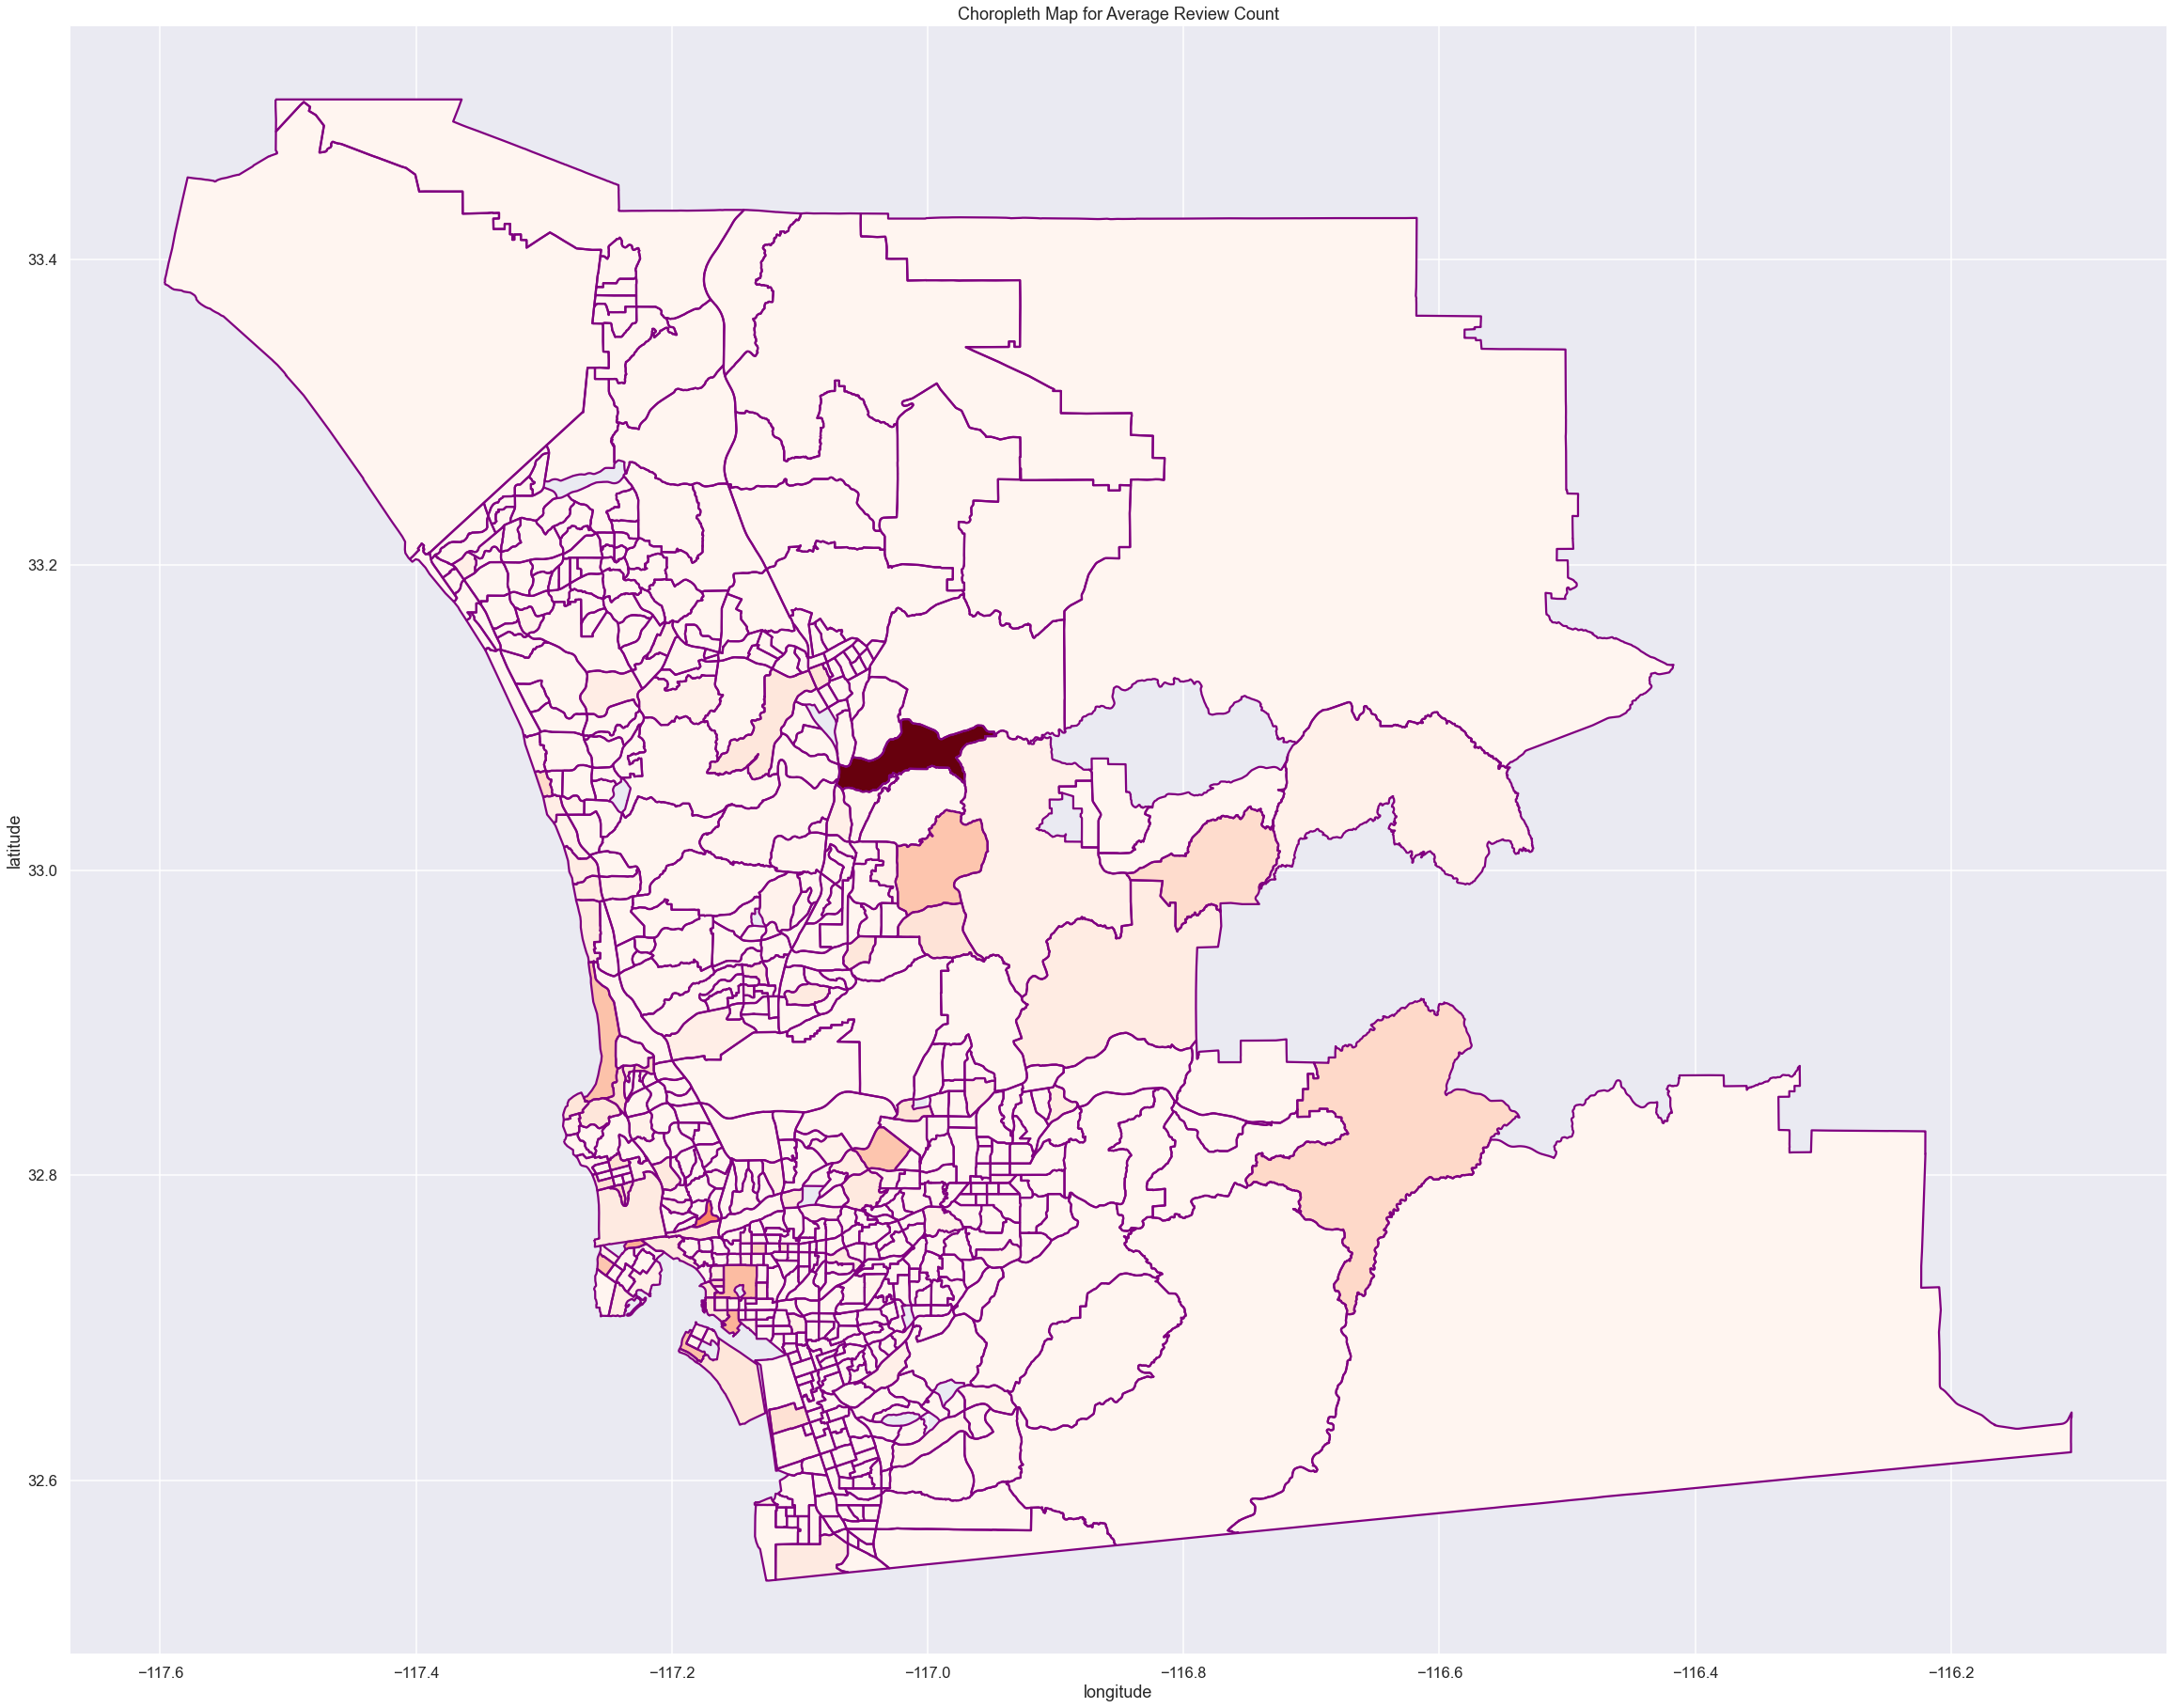

In [64]:
fig_tract_review, ax_tract_review = plt.subplots(figsize = (40,40)) 
gdf_tract_review.boundary.plot(edgecolor="purple", facecolor="None", ax=ax_tract_review);
gdf_tract_review.plot(column='review_count', cmap='Reds', ax=ax_tract_review)
ax_tract_review.set_ylabel('latitude')
ax_tract_review.set_xlabel('longitude')
ax_tract_review.set_title('Choropleth Map for Average Review Count')

From the graph, we can see there are few tracts with very high average review counts.

For other tracts, there is not hugh difference considering there are a limited number of popular parks in San Diego.

As a result, we try to visualize the distribution of the review counts without the most popular ones and see what happens.

In [65]:
# Find the most popular parks and check their tracts
df_ypark.sort_values(by=['review_count'], ascending=False).head(10)

name  \
358               san diego zoo   
382          seaworld san diego   
360   san diego zoo safari park   
0                   balboa park   
477                  petco park   
130           urbn - north park   
55                la jolla cove   
50   torrey pines state reserve   
425         encontro north park   
288             seaport village   

                                             address  rating  review_count  \
358                  2920 Zoo Dr San Diego, CA 92101     4.5          4549   
382              500 SeaWorld Dr San Diego, CA 92109     3.5          2803   
360  15500 San Pasqual Valley Rd Escondido, CA 92027     4.0          2208   
0                  1549 El Prado San Diego, CA 92101     5.0          2105   
477                100 Park Blvd San Diego, CA 92101     4.0          1667   
130          3085 University Ave San Diego, CA 92104     4.0          1659   
55                1100 Coast Blvd La Jolla, CA 92037     4.5          1320   
50        12600 N Torrey Pines Rd La Jolla, CA 92037     4.5          1319   
425          3001 University Ave San Diego, CA 92104     4.5          1127   
288              849 W Harbor Dr San Diego, CA 92101     4.0           967   

      longitude   latitude                          geometry       Tract  
358 -117.148784  32.735799   POINT (-117.1487843 32.7357987)  6073005600  
382 -117.226890  32.761990       POINT (-117.22689 32.76199)  6073006801  
360 -116.995725  33.097452     POINT (-116.995725 33.097452)  6073020710  
0   -117.153150  32.734502  POINT (-117.1531501 32.73450154)  6073005600  
477 -117.157054  32.707246     POINT (-117.157054 32.707246)  6073005100  
130 -117.127193  32.748306     POINT (-117.127193 32.748306)  6073001300  
55  -117.272899  32.850455  POINT (-117.2728988 32.85045528)  6073008200  
50  -117.259315  32.926950      POINT (-117.259315 32.92695)  6073008312  
425 -117.129760  32.748220       POINT (-117.12976 32.74822)  6073001300  
288 -117.170937  32.709071     POINT (-117.170937 32.709071)  6073005400

Text(0.5, 1.0, 'Choropleth Map for Average Review Count without Most Popular Parks')

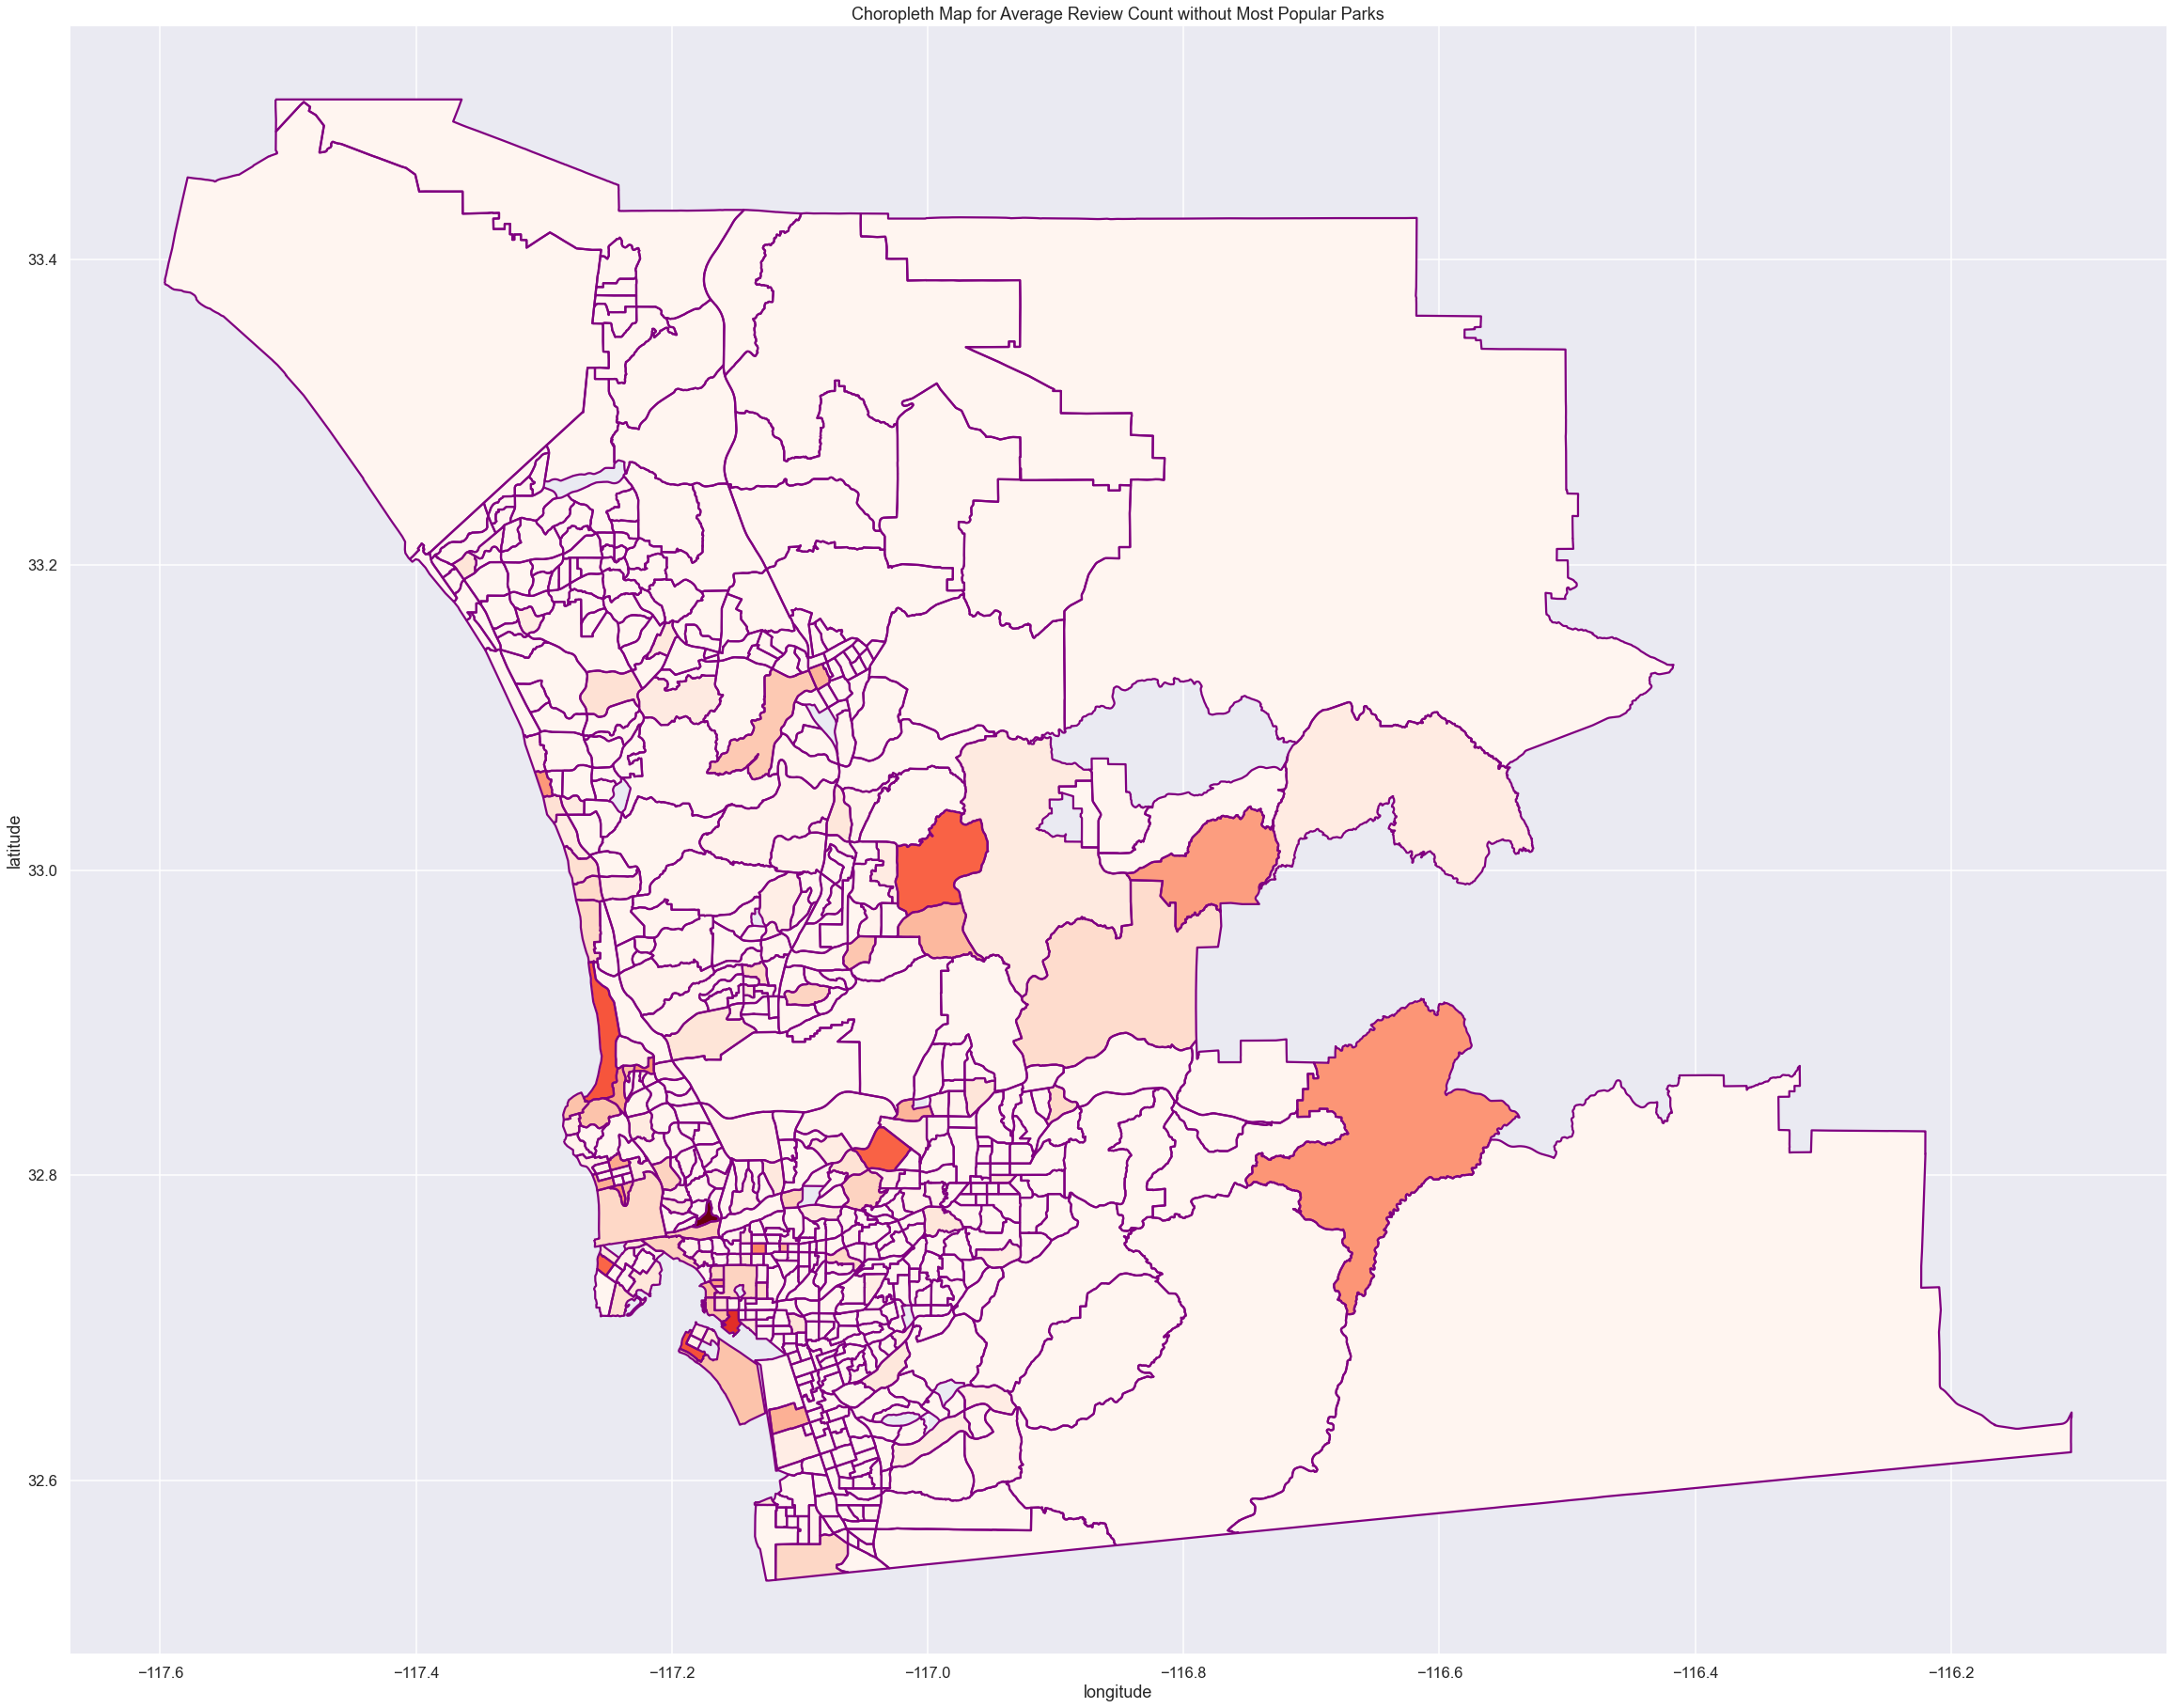

In [66]:
# Let's remove the top 4 and see what happens
df_ypark_trimed = df_ypark[~df_ypark['name'].isin(set(['san diego zoo', 'seaworld san diego', 'san diego zoo safari park', 'balboa park']))]

df_tract_review_trimed = df_ypark_trimed.groupby('Tract')['review_count'].mean().to_frame().reset_index()

df_tract_review_zero_trimed = pd.DataFrame(list(set(df_screen['Census Tract'].unique())-set(df_tract_review_trimed['Tract'].unique())), columns=['Tract'])
df_tract_review_zero_trimed['review_count'] = float(0)
df_tract_review_trimed = pd.concat([df_tract_review_trimed, df_tract_review_zero_trimed]).sort_values(by=['Tract']).reset_index(drop=True)

df_tract_review_trimed = df_tract_review_trimed.merge(gdf_census_tracts[['GEOID', 'geometry']], left_on='Tract', right_on='GEOID').drop(columns=['GEOID'])
gdf_tract_review_trimed = gpd.GeoDataFrame(df_tract_review_trimed, geometry='geometry')

fig_tract_review_trimed, ax_tract_review_trimed = plt.subplots(figsize = (40,40)) 
gdf_tract_review_trimed.boundary.plot(edgecolor="purple", facecolor="None", ax=ax_tract_review_trimed);
gdf_tract_review_trimed.plot(column='review_count', cmap='Reds', ax=ax_tract_review_trimed)

ax_tract_review_trimed.set_ylabel('latitude')
ax_tract_review_trimed.set_xlabel('longitude')
ax_tract_review_trimed.set_title('Choropleth Map for Average Review Count without Most Popular Parks')

In [67]:
df_ypark_trimed.sort_values(by=['review_count'], ascending=False).head(10)

name  \
477                  petco park   
130           urbn - north park   
55                la jolla cove   
50   torrey pines state reserve   
425         encontro north park   
288             seaport village   
80              cowles mountain   
13   sunset cliffs natural park   
254              fashion valley   
134              birch aquarium   

                                               address  rating  review_count  \
477                  100 Park Blvd San Diego, CA 92101     4.0          1667   
130            3085 University Ave San Diego, CA 92104     4.0          1659   
55                  1100 Coast Blvd La Jolla, CA 92037     4.5          1320   
50          12600 N Torrey Pines Rd La Jolla, CA 92037     4.5          1319   
425            3001 University Ave San Diego, CA 92104     4.5          1127   
288                849 W Harbor Dr San Diego, CA 92101     4.0           967   
80                Mission Gorge Rd San Diego, CA 92119     4.5           945   
13         1253 Sunset Cliffs Blvd San Diego, CA 92107     5.0           935   
254                 7007 Friars Rd San Diego, CA 92108     4.0           911   
134  2300 Expedition Way Scripps Institution of Oce...     4.0           828   

      longitude   latitude                          geometry       Tract  
477 -117.157054  32.707246     POINT (-117.157054 32.707246)  6073005100  
130 -117.127193  32.748306     POINT (-117.127193 32.748306)  6073001300  
55  -117.272899  32.850455  POINT (-117.2728988 32.85045528)  6073008200  
50  -117.259315  32.926950      POINT (-117.259315 32.92695)  6073008312  
425 -117.129760  32.748220       POINT (-117.12976 32.74822)  6073001300  
288 -117.170937  32.709071     POINT (-117.170937 32.709071)  6073005400  
80  -117.030556  32.813676     POINT (-117.030556 32.813676)  6073009805  
13  -117.255670  32.733440       POINT (-117.25567 32.73344)  6073007301  
254 -117.166780  32.767930     POINT (-117.16678 32.7679298)  6073008901  
134 -117.250640  32.865815      POINT (-117.25064 32.865815)  6073008313

### Analysis on trimmed dataset and map

When removing several outliers, we can see more tracts are having similarlly many review counts.

This is a hint that it's very likely for the popular parks to be the driving factors for review counts.

Let's go back to the complete dataset (not trimmed one)

Next step is to see if this is caused by the most popular parks in San Diego.

Because many tracts do not have any park, and our focus is the park not each tract, let's ignore the tracts with no park.

Text(0.5, 1.0, 'Choropleth Map for Average Review Count with At Least One Park')

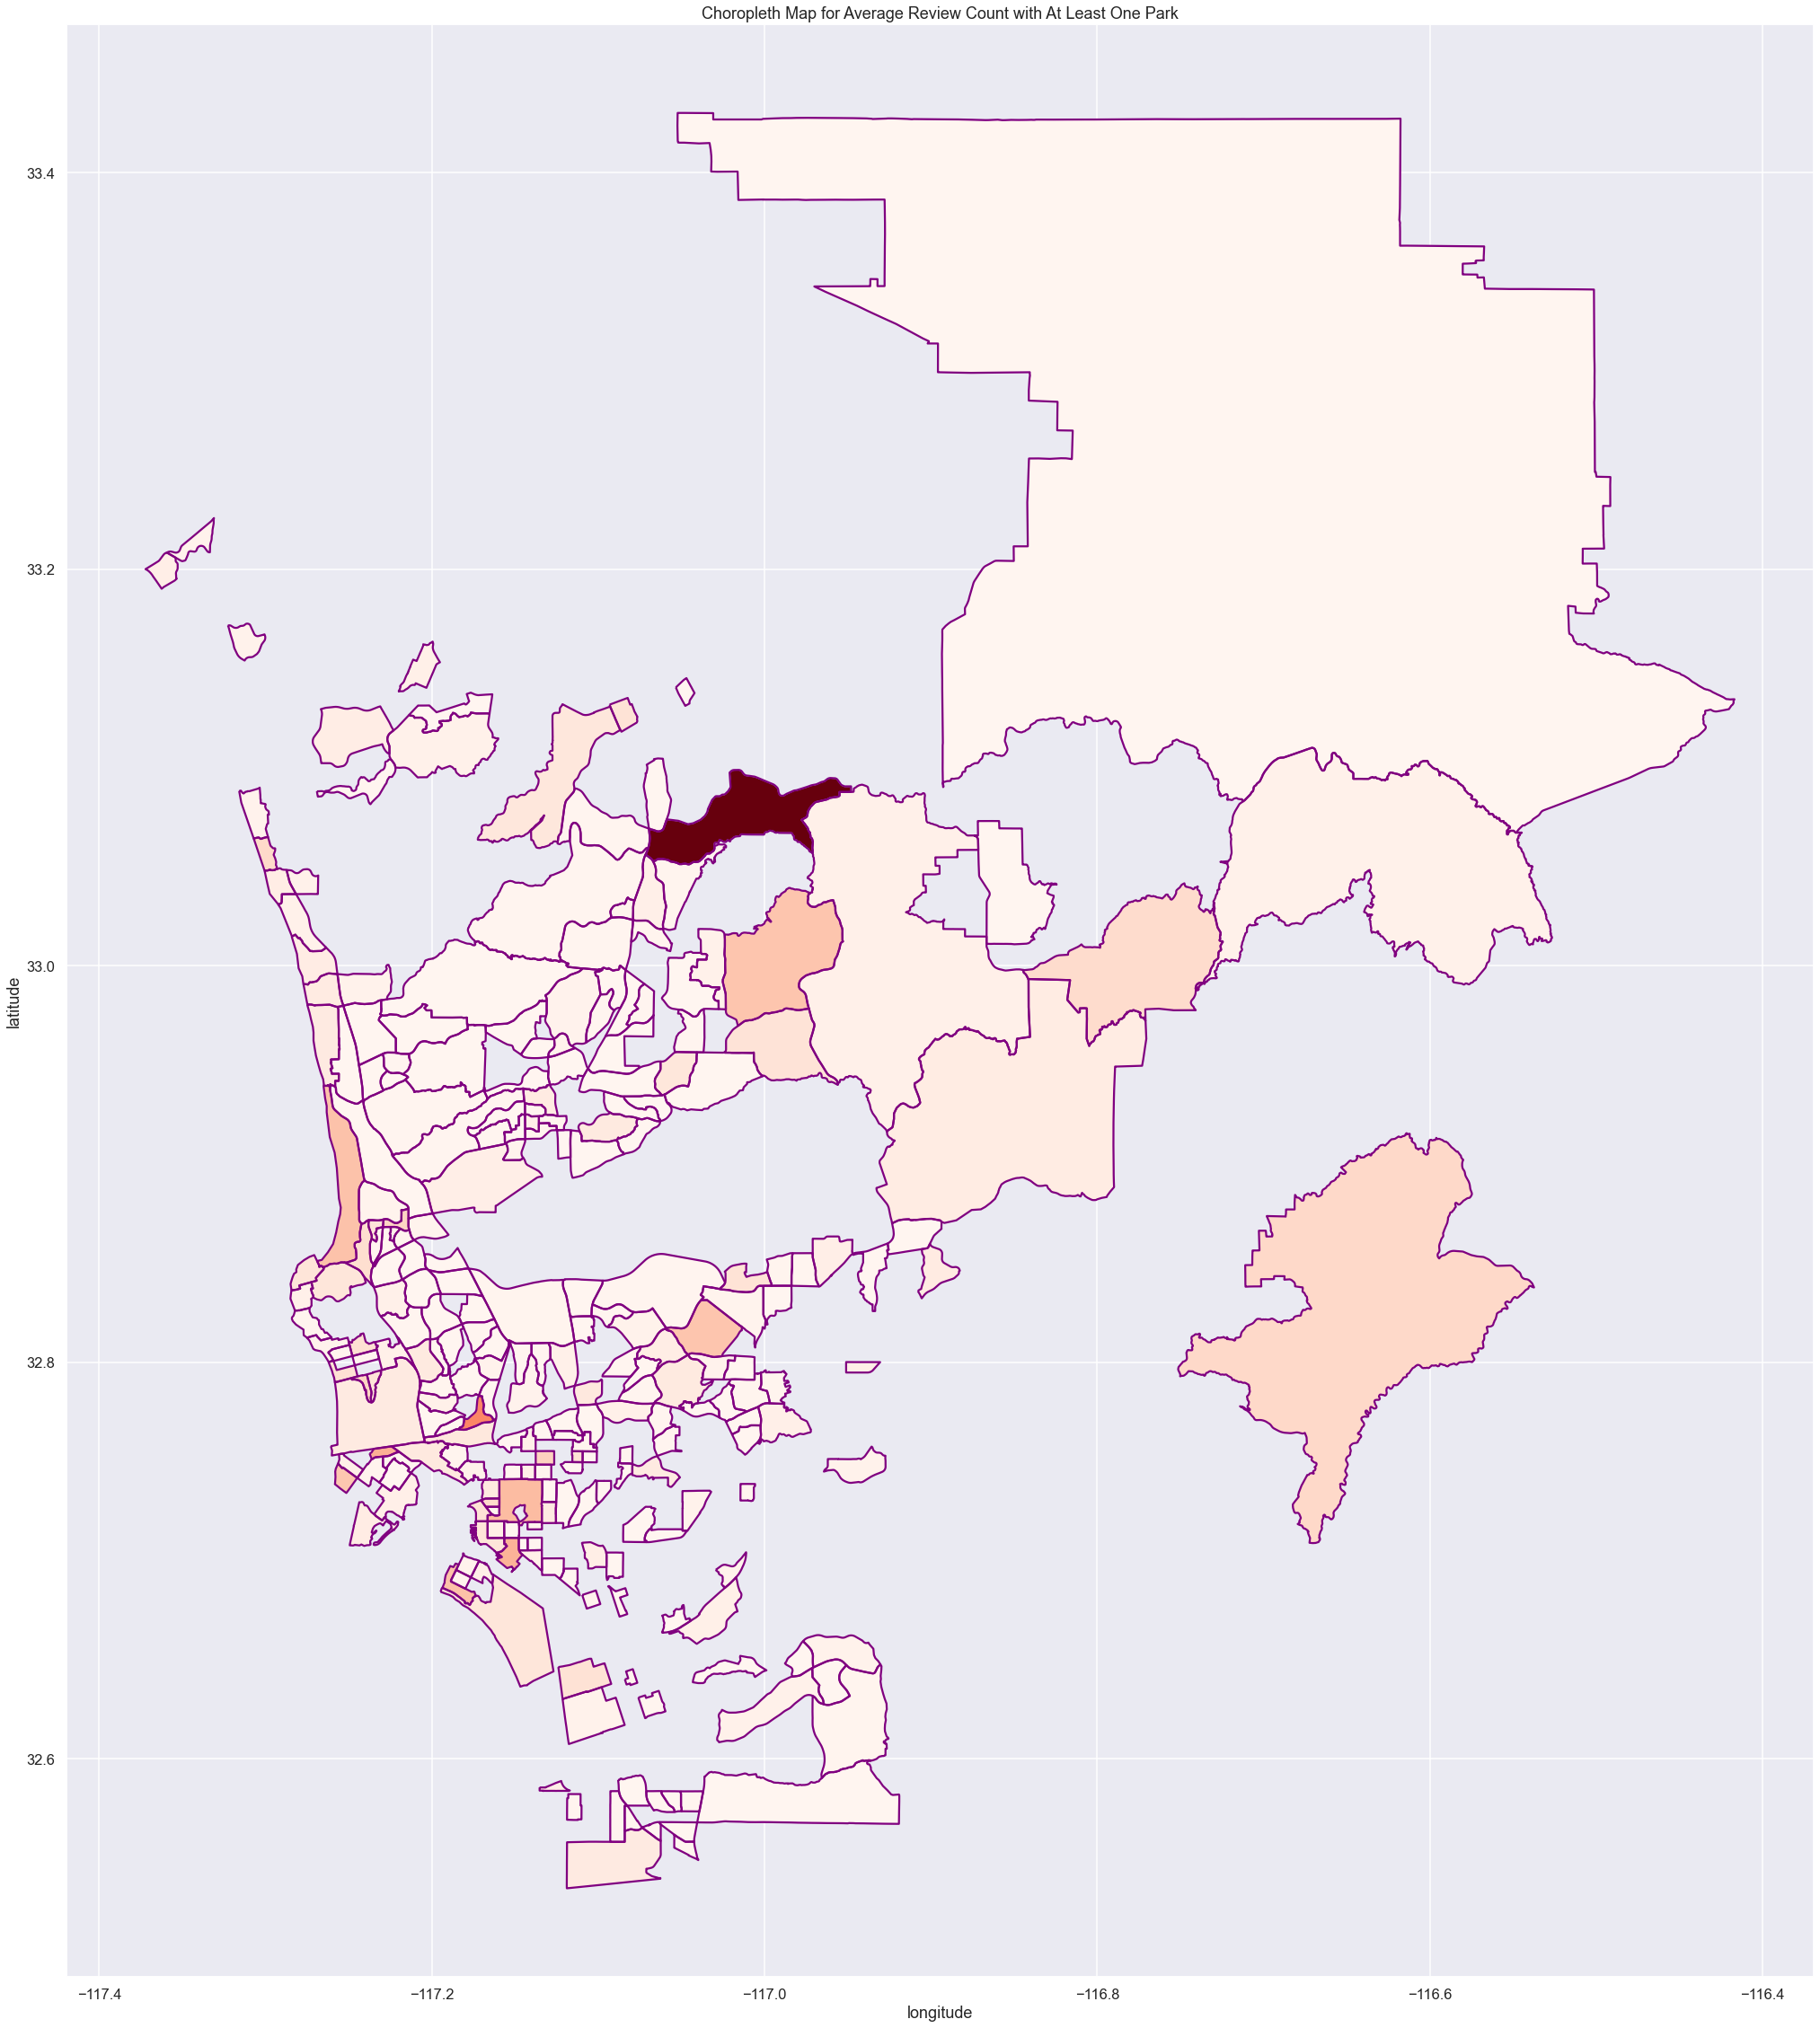

In [68]:
# Analyze the tracts with at least one park
df_tract_review_one = df_tract_review[df_tract_review['review_count'] != 0]
gdf_tract_review_one = gpd.GeoDataFrame(df_tract_review_one, geometry='geometry')

fig_tract_review_one, ax_tract_review_one = plt.subplots(figsize = (40,40)) 
gdf_tract_review_one.boundary.plot(edgecolor="purple", facecolor="None", ax=ax_tract_review_one);
gdf_tract_review_one.plot(column='review_count', cmap='Reds', ax=ax_tract_review_one)

ax_tract_review_one.set_ylabel('latitude')
ax_tract_review_one.set_xlabel('longitude')
ax_tract_review_one.set_title('Choropleth Map for Average Review Count with At Least One Park')

This map is simply what we have seen without the census tracts with no parks.

To begin with, let's check the distribution of the reveiw_count (i.e. the popularity of parks)

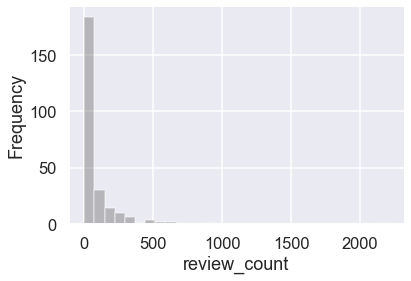

In [69]:
ax_tract_distplot = sns.distplot(df_tract_review_one['review_count'], bins=30, kde=False, color='#686868');
sns.despine()
ax_tract_distplot.set_title('')
ax_tract_distplot.set_ylabel('Frequency')
ax_tract_distplot.set_xlabel('review_count');

We can see the data is very skewed.

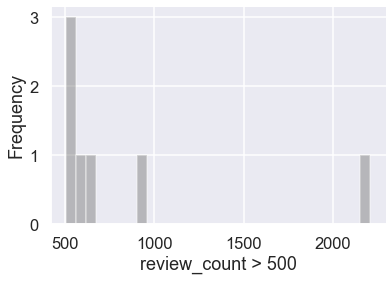

In [70]:
ax_tract_distplot = sns.distplot(df_tract_review_one[df_tract_review_one['review_count'] > 500]['review_count'], bins=30, kde=False, color='#686868');
sns.despine()
ax_tract_distplot.set_title('')
ax_tract_distplot.set_ylabel('Frequency')
ax_tract_distplot.set_xlabel('review_count > 500');

We can see there are only 7 parks with review_count > 500.

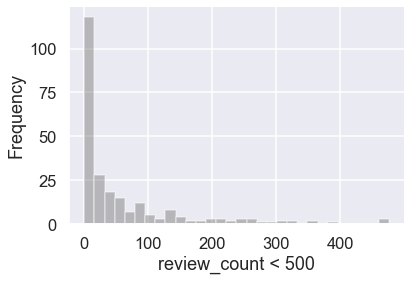

In [71]:
ax_tract_distplot = sns.distplot(df_tract_review_one[df_tract_review_one['review_count'] < 500]['review_count'], bins=30, kde=False, color='#686868');
sns.despine()
ax_tract_distplot.set_title('')
ax_tract_distplot.set_ylabel('Frequency')
ax_tract_distplot.set_xlabel('review_count < 500');

This is the distribution for parks with review_count < 500.

It's still very skewed.

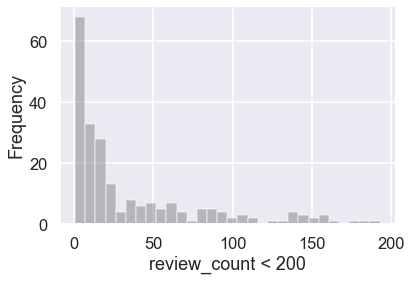

In [72]:
ax_tract_distplot = sns.distplot(df_tract_review_one[df_tract_review_one['review_count'] < 200]['review_count'], bins=30, kde=False, color='#686868');
sns.despine()
ax_tract_distplot.set_title('')
ax_tract_distplot.set_ylabel('Frequency')
ax_tract_distplot.set_xlabel('review_count < 200');

Even for the parks with review_count < 200, it's still highly skewed. A lot of parks do not have more than 50 reviews.

### Analysis on park popularity

From the histrams, we can see for the majority of the data points, the parks do not have more than 50 reviews.

And for the rest of the dataset, only a few parks have more than 100 reviews.

Let's check the parks in the tracts with the highest review_count

In [73]:
df_tract_review_one.sort_values(by=['review_count'], ascending=False).head()

Tract  review_count  \
578  6073020710      2208.000   
193  6073008901       911.000   
107  6073006801       630.200   
96   6073005100       609.000   
100  6073005600       551.375   

                                              geometry  
578  POLYGON ((-117.071694 33.055927, -117.07152 33...  
193  POLYGON ((-117.183608 32.766458, -117.1836 32....  
107  POLYGON ((-117.237303 32.754045, -117.236932 3...  
96   POLYGON ((-117.16146 32.703271, -117.160888 32...  
100  POLYGON ((-117.166496 32.722993, -117.16632 32...

In [74]:
df_ypark_popular = df_ypark[df_ypark['Tract'].isin(
    set(df_tract_review_one.sort_values(by=['review_count'], ascending=False).head(10)['Tract'])
)].sort_values(by=['Tract'])
df_ypark_popular.head()

name                                        address  \
477           petco park              100 Park Blvd San Diego, CA 92101   
383      coronado bridge             CA-75 Coronado San Diego, CA 92101   
287  east village square                   855 J St San Diego, CA 92101   
447          zoro garden  1649 El Prado Balboa Park San Diego, CA 92101   
358        san diego zoo                2920 Zoo Dr San Diego, CA 92101   

     rating  review_count   longitude   latitude  \
477     4.0          1667 -117.157054  32.707246   
383     4.5           158 -117.153352  32.689442   
287     4.5             2 -117.156894  32.709255   
447     4.0            11 -117.149055  32.731315   
358     4.5          4549 -117.148784  32.735799   

                                   geometry       Tract  
477           POINT (-117.157054 32.707246)  6073005100  
383           POINT (-117.153352 32.689442)  6073005100  
287  POINT (-117.1568943 32.70925510000001)  6073005100  
447           POINT (-117.149055 32.731315)  6073005600  
358         POINT (-117.1487843 32.7357987)  6073005600

In [75]:
df_ypark_popular.groupby('Tract')['review_count'].count().sort_values()

Tract
6073008901     1
6073017021     1
6073020710     1
6073007301     2
6073009805     2
6073021800     2
6073005100     3
6073008312     3
6073006801     5
6073005600    16
Name: review_count, dtype: int64

We can see for the tracts with most review_count, many only have one or two parks that are extremely popular.

Let's try to visualize the distribution after dropping those tracts.

Text(0.5, 1.0, 'Choropleth Map for Average Review Count without Most Popular Parks')

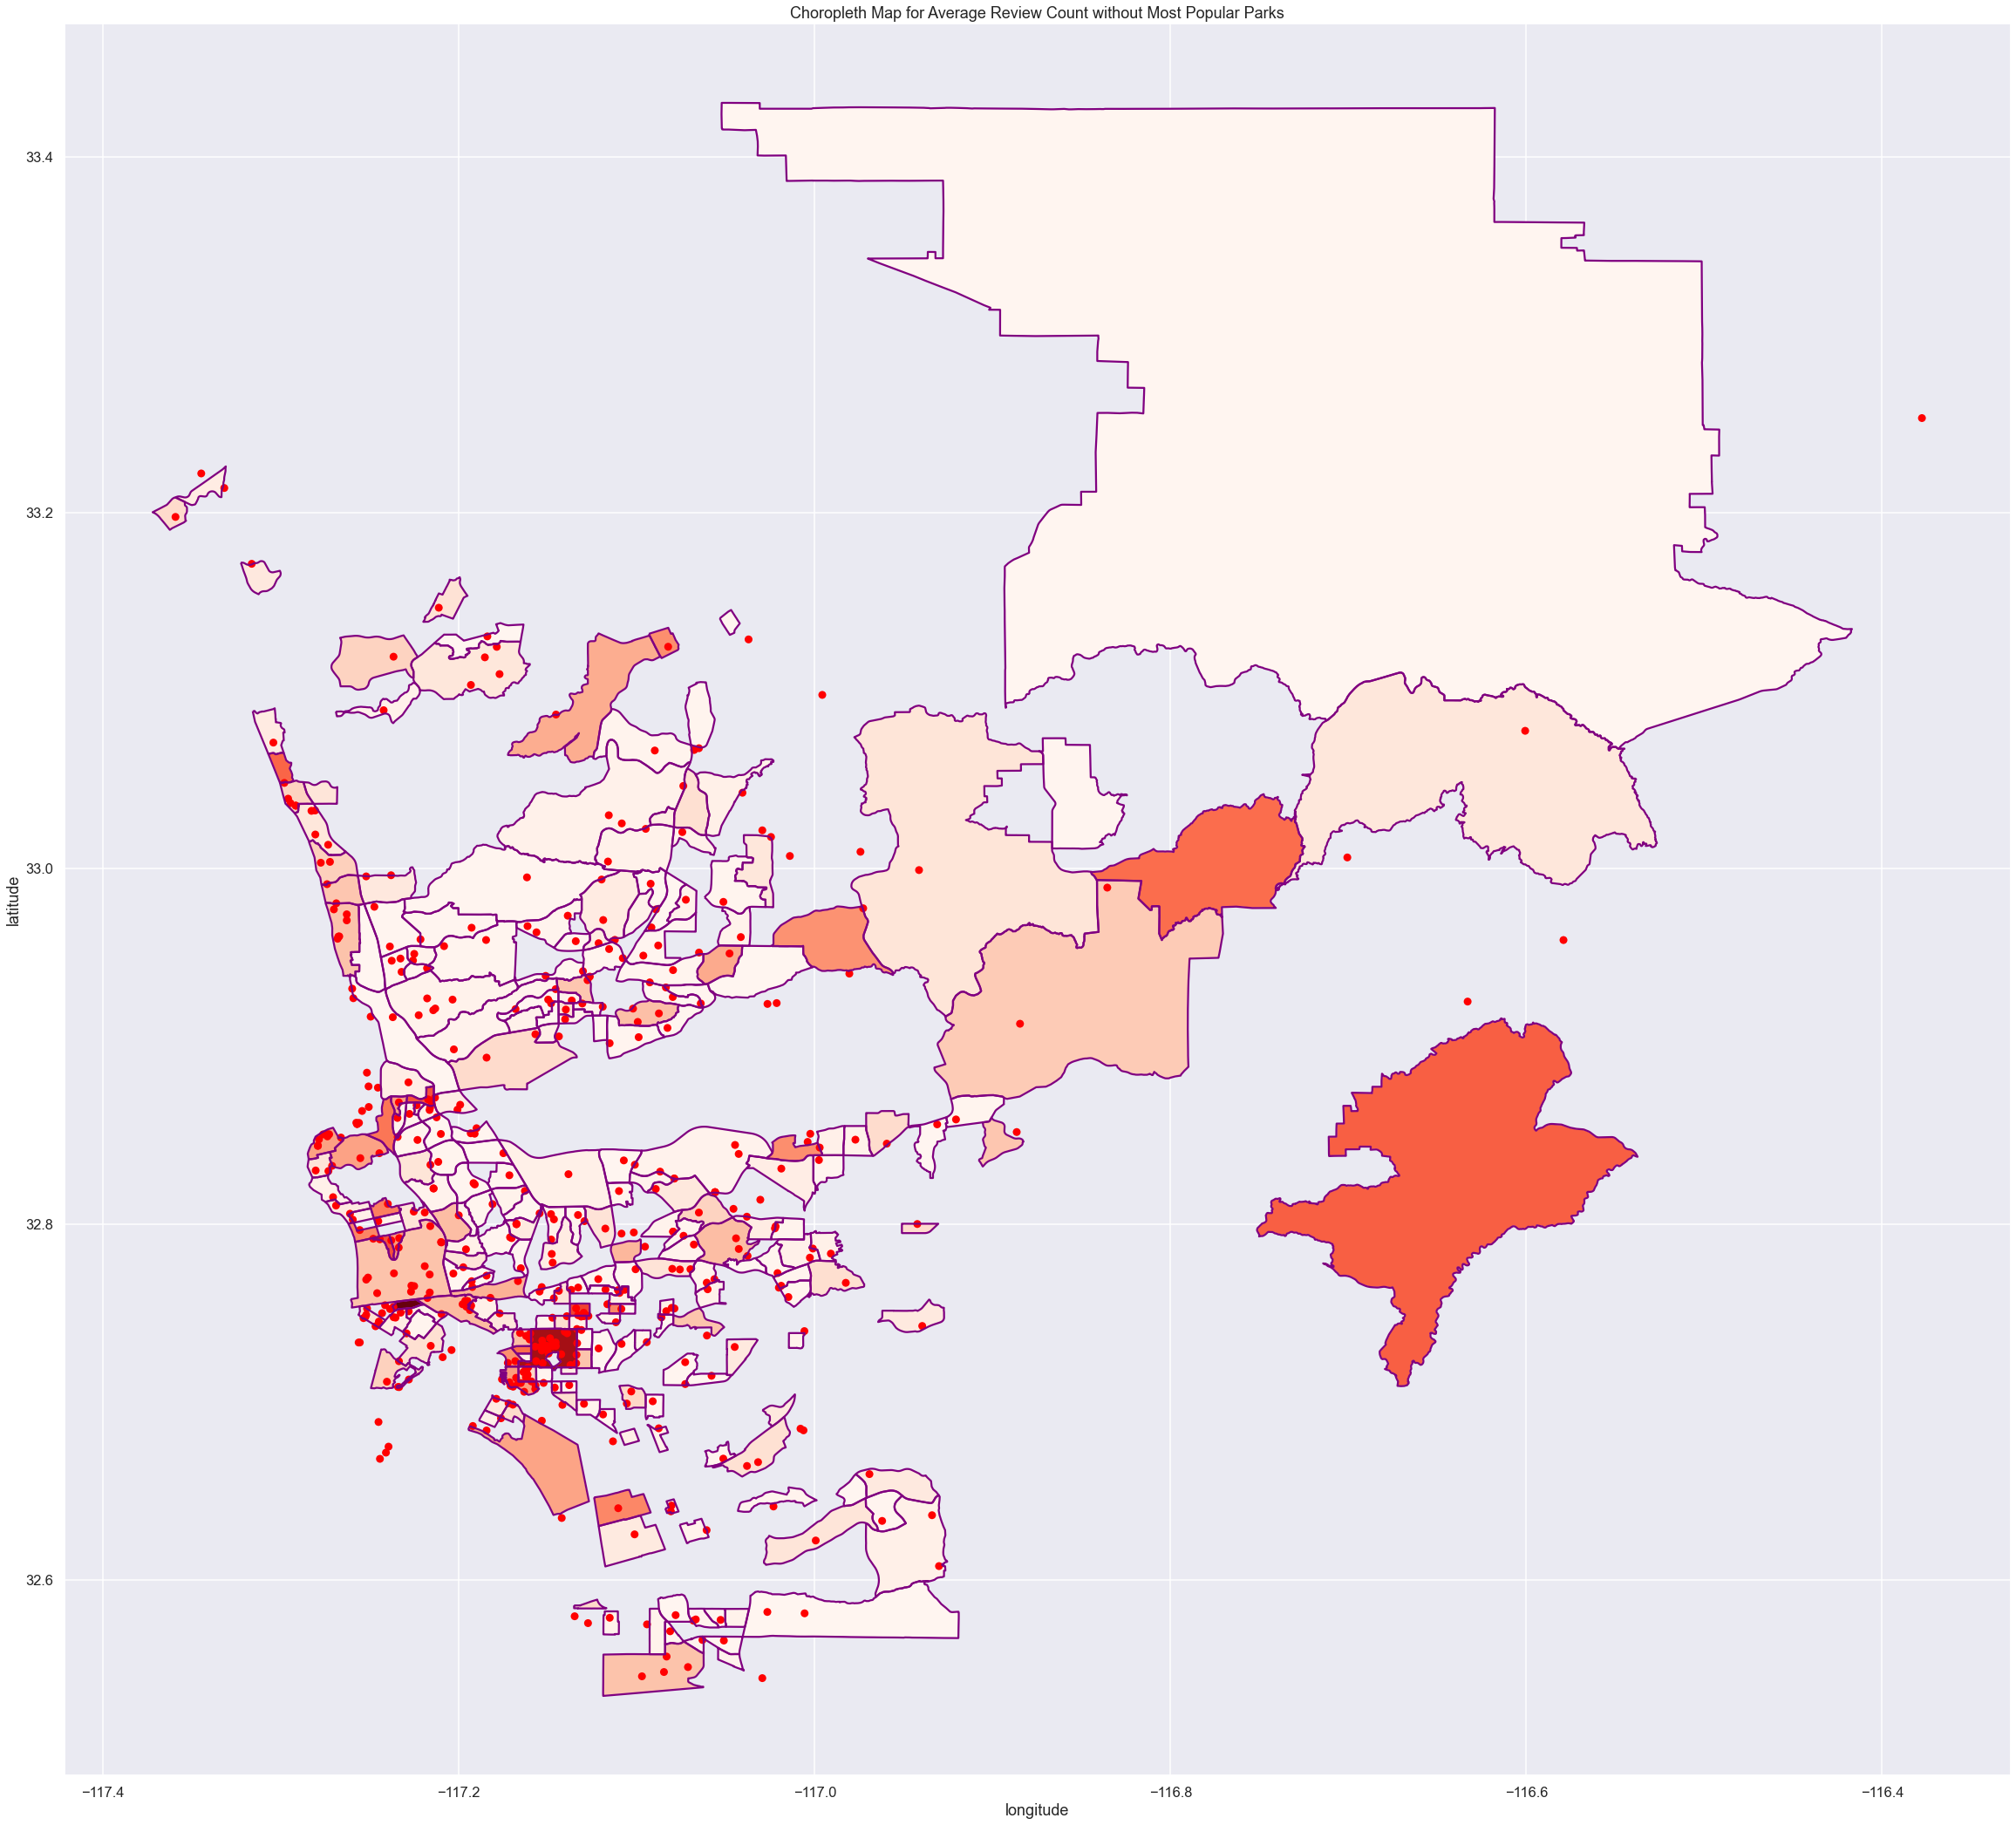

In [76]:
set_partial_popular = set(['6073008901','6073017021','6073020710', '6073007301', '6073009805', '6073021800', '6073005100','6073008312'])
df_tract_review_tail = df_tract_review_one[~df_tract_review_one['Tract'].isin(set_partial_popular)]
gdf_tract_review_tail = gpd.GeoDataFrame(df_tract_review_tail, geometry='geometry')

fig_tract_review_tail, ax_tract_review_tail = plt.subplots(figsize = (40,40)) 
gdf_tract_review_tail.boundary.plot(edgecolor="purple", facecolor="None", ax=ax_tract_review_tail);
gdf_tract_review_tail.plot(column='review_count', cmap='Reds', ax=ax_tract_review_tail)
gdf_ypark.plot(edgecolor="None", facecolor="Red", ax=ax_tract_review_tail)

ax_tract_review_tail.set_ylabel('latitude')
ax_tract_review_tail.set_xlabel('longitude')
ax_tract_review_tail.set_title('Choropleth Map for Average Review Count without Most Popular Parks')

From the first sight, we can see the more parks on tract has, it's more likely to have higher number of reviews.

Let's verify this by calculating the correlation between the number of parks and the number of reviews.

For this project, we use an **alpha significance value of 0.05**.

We calculate the correlation and the p-value between the number of the reviews and

* number of parks
* number of parks with more than 100 reviews
* number of parks with more than 200 reviews
* number of parks that is the top 100 popular ones

In [77]:
set_top_popular_parks = set(df_ypark.sort_values(by='review_count').head(100)['name'])

In [78]:
df_tract_review = df_tract_review.merge(
    df_ypark.groupby('Tract').count().reset_index()[['Tract', 'name']].rename(columns={'name':'park_count'}),
    on='Tract').merge(
    df_ypark[df_ypark['review_count'] > 100].groupby('Tract').count().reset_index()[['Tract', 'name']].rename(columns={'name':'popular_park_count'}),
    on='Tract').merge(
    df_ypark[df_ypark['review_count'] > 200].groupby('Tract').count().reset_index()[['Tract', 'name']].rename(columns={'name':'very_popular_park_count'}),
    on='Tract').merge(
    df_ypark[df_ypark['name'].isin(set_top_popular_parks)].groupby('Tract').count().reset_index()[['Tract', 'name']].rename(columns={'name':'top_popular_park_count'}),
    on='Tract')
df_tract_review.head()

Tract  review_count  \
0  6073001300    382.454545   
1  6073004400    140.000000   
2  6073005100    609.000000   
3  6073005300     98.800000   
4  6073005600    551.375000   

                                            geometry  park_count  \
0  POLYGON ((-117.13759 32.755283, -117.137341 32...          11   
1  POLYGON ((-117.134122 32.728524, -117.133966 3...           2   
2  POLYGON ((-117.16146 32.703271, -117.160888 32...           3   
3  POLYGON ((-117.166502 32.711685, -117.16649 32...          10   
4  POLYGON ((-117.166496 32.722993, -117.16632 32...          16   

   popular_park_count  very_popular_park_count  top_popular_park_count  
0                   6                        5                       2  
1                   1                        1                       1  
2                   2                        1                       1  
3                   3                        2                       4  
4                   8                        8                       1

In [79]:
stats.spearmanr(df_tract_review['review_count'], df_tract_review['park_count'])

SpearmanrResult(correlation=-0.13242147184339473, pvalue=0.6979199533984652)

In [80]:
stats.spearmanr(df_tract_review['review_count'], df_tract_review['popular_park_count'])

SpearmanrResult(correlation=0.15539093108484367, pvalue=0.6482260658949748)

In [81]:
stats.spearmanr(df_tract_review['review_count'], df_tract_review['very_popular_park_count'])

SpearmanrResult(correlation=0.2956659985900478, pvalue=0.3773729464628114)

In [82]:
stats.spearmanr(df_tract_review['review_count'], df_tract_review['top_popular_park_count'])

SpearmanrResult(correlation=-0.5980594550489712, pvalue=0.051956797796661146)

### Analysis on correlation with number of parks

None of the p-values are small enough to reject the hypothesis.

This means the number of reviews are positively correlated with the number of the parks with more than 100 or 200 reviews, but this is not statically significant.

We try to calculate the correlation between the review_count and other data of each tract and see if there is anything interesting.

In [83]:
df_tract_merged = df_tract_review.merge(df_screen, left_on='Tract', right_on='Census Tract').drop(columns=['Census Tract'])
df_tract_merged.head()

Tract  review_count  \
0  6073001300    382.454545   
1  6073004400    140.000000   
2  6073005100    609.000000   
3  6073005300     98.800000   
4  6073005600    551.375000   

                                          geometry_x  park_count  \
0  POLYGON ((-117.13759 32.755283, -117.137341 32...          11   
1  POLYGON ((-117.134122 32.728524, -117.133966 3...           2   
2  POLYGON ((-117.16146 32.703271, -117.160888 32...           3   
3  POLYGON ((-117.166502 32.711685, -117.16649 32...          10   
4  POLYGON ((-117.166496 32.722993, -117.16632 32...          16   

   popular_park_count  very_popular_park_count  top_popular_park_count  \
0                   6                        5                       2   
1                   1                        1                       1   
2                   2                        1                       1   
3                   3                        2                       4   
4                   8                        8                       1   

   Total Population  CES 2.0 Score CES 2.0 Percentile Range  \
0              6197          19.30                   36-40%   
1              3866          14.60                   21-25%   
2              7140          47.81                   86-90%   
3              6667          27.58                   56-60%   
4              4463          24.24                   51-55%   

                ...                   Poverty  Poverty Pctl  Unemployment  \
0               ...                 49.126670         73.47         12.75   
1               ...                 30.999748         48.39          7.67   
2               ...                 69.253137         93.47         25.23   
3               ...                 41.966306         64.41          2.89   
4               ...                 27.084531         41.58          2.69   

   Unemployment Pctl  Pop. Char.   Pop. Char. Score  Pop. Char. Pctl  \
0              66.62    54.565558          5.670727            59.00   
1              26.43    38.499220          4.000977            32.02   
2              98.13    70.755455          7.353155            84.49   
3               1.54    48.042901          4.992829            47.75   
4               1.27    34.375893          3.572498            24.13   

    latitude   longitude                       geometry_y  
0  32.751272 -117.132317  POINT (-117.1323173 32.7512721)  
1  32.724337 -117.129657   POINT (-117.129657 32.7243369)  
2  32.703738 -117.152808  POINT (-117.1528082 32.7037376)  
3  32.715683 -117.161510  POINT (-117.1615102 32.7156831)  
4  32.730388 -117.147224  POINT (-117.1472238 32.7303885)  

[5 rows x 57 columns]

In [84]:
df_tract_merged.corr(method='spearman')['review_count'].sort_values(ascending=False).head(15)

review_count              1.000000
Traffic                   0.500000
Traffic Pctl              0.500000
Poverty Pctl              0.436364
Poverty                   0.436364
Solid Waste Pctl          0.417502
Solid Waste               0.417502
Pesticides                0.400000
Pesticides Pctl           0.400000
CES 2.0 Score             0.363636
Pop. Char. Pctl           0.363636
Pop. Char. Score          0.363636
Pop. Char.                0.363636
Pollution Burden Score    0.327273
Pollution Burden Pctl     0.327273
Name: review_count, dtype: float64

In [85]:
stats.spearmanr(df_tract_merged['review_count'], df_tract_merged['Traffic'])

SpearmanrResult(correlation=0.5, pvalue=0.11730680301423815)

In [86]:
stats.spearmanr(df_tract_merged['review_count'], df_tract_merged['Poverty'])

SpearmanrResult(correlation=0.43636363636363645, pvalue=0.17966487658001123)

In [87]:
stats.spearmanr(df_tract_merged['review_count'], df_tract_merged['Solid Waste'])

SpearmanrResult(correlation=0.41750245555596066, pvalue=0.20137831491379704)

In [88]:
stats.spearmanr(df_tract_merged['review_count'], df_tract_merged['Pesticides'])

SpearmanrResult(correlation=0.4000000000000001, pvalue=0.22286835013352002)

### Analysis on correlation

None of those are statically significant, even though Traffic and Poverty seems to be more correlated.

In [89]:
outcome_review, predictors_review = patsy.dmatrices('review_count ~ park_count + popular_park_count + very_popular_park_count + top_popular_park_count', df_tract_merged)
mod_review = sm.OLS(outcome_review, predictors_review)
res_review = mod_review.fit()

In [90]:
print(res_review.summary())

                            OLS Regression Results                            
Dep. Variable:           review_count   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     2.533
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.148
Time:                        20:51:36   Log-Likelihood:                -67.861
No. Observations:                  11   AIC:                             145.7
Df Residuals:                       6   BIC:                             147.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [91]:
outcome_review, predictors_review = patsy.dmatrices('review_count ~ park_count + popular_park_count + very_popular_park_count + top_popular_park_count + Traffic + Poverty + Q("Solid Waste") + Pesticides', df_tract_merged)
mod_review = sm.OLS(outcome_review, predictors_review)
res_review = mod_review.fit()

In [92]:
print(res_review.summary())

                            OLS Regression Results                            
Dep. Variable:           review_count   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                 -0.087
Method:                 Least Squares   F-statistic:                    0.9000
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.625
Time:                        20:51:36   Log-Likelihood:                -64.907
No. Observations:                  11   AIC:                             147.8
Df Residuals:                       2   BIC:                             151.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


### Analysis on OLS Regression

Based on all the p values, we don't have strong evidence to say any of the factors significantly affect the number of reviews.

This is reasonable. Since none of those factors will directly push any person to leave more reviews on Yelps for parks.

## Result

From all the analysis above, we fail to support our hypothesis with statictically significant evidence. Thus we cannot make conclusion on whether more popular parks means more average reviews on Yelp.

If we slightly loosen the threshold, we can see the number of parks with more than 100 reviews (i.e. the gerneally more popular parks) have positive correleation coefficient with the number of reviews.

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

This project did not use any personal information. All the data do not direct relate to any individual. For the Yelp data, it may relate to single business, but as the number of reviews do not have any harm on them, and all the inforamtion are public, it does not have high threats towards ethics or privacy.

Did you have permission to use this data / use it for this purpose?

* Yes.

Are there privacy concerns regarding your datasets that you need to deal with, and/or terms of use that you need to comply with?

* No.

Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)

* Yes. Not everyone leaves reviews on Yelp. In fact, most people do not review parks on Yelp. The data collected may have strong bias towards the people who are active on Yelp and who likes to leave reviews.
* But this is not problematic in terms of it allowing for equitable analysis
* Our research goal itself is why for the people who did leave reviews on Yelp behave differently

Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?

* One potential that may be problematic in terms of equitable impact is that many people without enough income do not have access to the internet and do not have the ability to review on Yelp

How will you handle issues you identified?

* This issue is beyond the scope of this project, as we only want to know about the people who did review on Yelp
* If we need to consider those, we need to fundamentally change our reserach question. We cannot include any specific online platform at all
* Even we only consider paper-based census, it still suffers from the possible lack of coverage
* Thus we highlight the platform we conduct the research, i.e. Yelp

# Conclusion & Discussion

*Fill in your discussion information here*

This project analyzed the distribution of the average number of reviews on Yelp for San Diego parks and recreation centers. The primary data used were the Yelp review data and the question is why do different areas in San Diego have different average number of reviews.

My analysis used Spearman rank-order correlation coefficient measure and OLS regression to check the correlation coefficients and the corresponding p-values. No significant relationship can be supported by strong evidence. The number of popular parks do not have statistically significant linear relationships with the average number of reviews. Thus I cannot support the hypothesis.

The limitations are clear: I don't have the data of most factors that directly push more people to leave more Yelp reviews. Also the popular parks are defined with the number of review_count as well. So essentially speaking the analysis is based only on one data. There is no other better souce of the list of popular parks in San Diego used in this project.

Another limitation is the labelling. I used the census tract to label each sub-area of San Diego. But in real life it may be more useful to label using the larger neighborhoods.

This work does not have direct impacts on the society. It might help people to better understand the parks of San Diego, understand what parks or recreation centers are most popular on Yelp, understand that the popular parks do not distribute uniformally across the whole San Diego county (i.e. a few census tracts have the top popular parks). This may help us to not only think about the access to parks of San Diego residents only but also consider the reviews for the parks.